### OLA Driver Churn

#### Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Data Pre-Processing
- Model Training
- Choosing the best model

#### 1.)Problem Statement
##### This project  tried to understand the reason for churn among the drivers of OLA, and see how other vairables such as Age, Gender, Date of Joining, etc. contribute to the cause

#### 2) Data Collection
##### Data source: https://www.kaggle.com/datasets/noohinaaz/ola-driver-cjurn-ensemble-learning/data

#### 3) About the data
- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import CSV data as Pandas DataFrame

In [2]:
df=pd.read_csv("ola_driver_scaler.csv")

#### Showing top 5 records

In [3]:
df.head(10)

Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0           0  01/01/19          1  28.0     0.0  C23                2   
1           1  02/01/19          1  28.0     0.0  C23                2   
2           2  03/01/19          1  28.0     0.0  C23                2   
3           3  11/01/20          2  31.0     0.0   C7                2   
4           4  12/01/20          2  31.0     0.0   C7                2   
5           5  12/01/19          4  43.0     0.0  C13                2   
6           6  01/01/20          4  43.0     0.0  C13                2   
7           7  02/01/20          4  43.0     0.0  C13                2   
8           8  03/01/20          4  43.0     0.0  C13                2   
9           9  04/01/20          4  43.0     0.0  C13                2   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387      24/12/18             NaN                    1      1   
1   57387      24/12/18             NaN                    1      1   
2   57387      24/12/18        03/11/19                    1      1   
3   67016      11/06/20             NaN                    2      2   
4   67016      11/06/20             NaN                    2      2   
5   65603      12/07/19             NaN                    2      2   
6   65603      12/07/19             NaN                    2      2   
7   65603      12/07/19             NaN                    2      2   
8   65603      12/07/19             NaN                    2      2   
9   65603      12/07/19        27/04/20                    2      2   

   Total Business Value  Quarterly Rating  
0               2381060                 2  
1               -665480                 2  
2                     0                 2  
3                     0                 1  
4                     0                 1  
5                     0                 1  
6                     0                 1  
7                     0                 1  
8                350000                 1  
9                     0                 1

#### Creating a  new column total business to equate the values of the 'Total Business Value' column

In [4]:
df['totalbusiness']= df.groupby('Driver_ID')['Total Business Value'].transform('sum')

In [5]:
df.head(20)

Unnamed: 0    MMM-YY  Driver_ID   Age  Gender City  Education_Level  \
0            0  01/01/19          1  28.0     0.0  C23                2   
1            1  02/01/19          1  28.0     0.0  C23                2   
2            2  03/01/19          1  28.0     0.0  C23                2   
3            3  11/01/20          2  31.0     0.0   C7                2   
4            4  12/01/20          2  31.0     0.0   C7                2   
5            5  12/01/19          4  43.0     0.0  C13                2   
6            6  01/01/20          4  43.0     0.0  C13                2   
7            7  02/01/20          4  43.0     0.0  C13                2   
8            8  03/01/20          4  43.0     0.0  C13                2   
9            9  04/01/20          4  43.0     0.0  C13                2   
10          10  01/01/19          5  29.0     0.0   C9                0   
11          11  02/01/19          5  29.0     0.0   C9                0   
12          12  03/01/19          5  29.0     0.0   C9                0   
13          13  08/01/20          6  31.0     1.0  C11                1   
14          14  09/01/20          6  31.0     1.0  C11                1   
15          15  10/01/20          6  31.0     1.0  C11                1   
16          16  11/01/20          6  31.0     1.0  C11                1   
17          17  12/01/20          6  31.0     1.0  C11                1   
18          18  09/01/20          8  34.0     0.0   C2                0   
19          19  10/01/20          8  34.0     0.0   C2                0   

    Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0    57387      24/12/18             NaN                    1      1   
1    57387      24/12/18             NaN                    1      1   
2    57387      24/12/18        03/11/19                    1      1   
3    67016      11/06/20             NaN                    2      2   
4    67016      11/06/20             NaN                    2      2   
5    65603      12/07/19             NaN                    2      2   
6    65603      12/07/19             NaN                    2      2   
7    65603      12/07/19             NaN                    2      2   
8    65603      12/07/19             NaN                    2      2   
9    65603      12/07/19        27/04/20                    2      2   
10   46368      01/09/19             NaN                    1      1   
11   46368      01/09/19             NaN                    1      1   
12   46368      01/09/19        03/07/19                    1      1   
13   78728      31/07/20             NaN                    3      3   
14   78728      31/07/20             NaN                    3      3   
15   78728      31/07/20             NaN                    3      3   
16   78728      31/07/20             NaN                    3      3   
17   78728      31/07/20             NaN                    3      3   
18   70656      19/09/20             NaN                    3      3   
19   70656      19/09/20             NaN                    3      3   

    Total Business Value  Quarterly Rating  totalbusiness  
0                2381060                 2        1715580  
1                -665480                 2        1715580  
2                      0                 2        1715580  
3                      0                 1              0  
4                      0                 1              0  
5                      0                 1         350000  
6                      0                 1         350000  
7                      0                 1         350000  
8                 350000                 1         350000  
9                      0                 1         350000  
10                     0                 1         120360  
11                120360                 1         120360  
12                     0                 1         120360  
13                     0                 1        1265000  
14             

#### Shape of the dataset

In [6]:
df.shape

(19104, 15)

#### 3. Data Checks to Perform
- Check Missing Values
- Check Duplicates
- Check Data type
- Check the number of unique values of each column
- Check statistics of the dataset
- Check various categories present in the different categorical column

####  3.1 Checking missing values

In [7]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
totalbusiness               0
dtype: int64

The data has missing values in Age, Gender and LastWorkingDate Column

#### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

There are no duplicate values

#### 3.3 Checking Data Type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
 14  totalbusiness         19104 non-null  int64  
dtypes: float64(2), int6

#### 3.5 Checking statistics of data set

In [10]:
df.describe()

Unnamed: 0     Driver_ID           Age        Gender  \
count  19104.000000  19104.000000  19043.000000  19052.000000   
mean    9551.500000   1415.591133     34.668435      0.418749   
std     5514.994107    810.705321      6.257912      0.493367   
min        0.000000      1.000000     21.000000      0.000000   
25%     4775.750000    710.000000     30.000000      0.000000   
50%     9551.500000   1417.000000     34.000000      0.000000   
75%    14327.250000   2137.000000     39.000000      1.000000   
max    19103.000000   2788.000000     58.000000      1.000000   

       Education_Level         Income  Joining Designation         Grade  \
count     19104.000000   19104.000000         19104.000000  19104.000000   
mean          1.021671   65652.025126             1.690536      2.252670   
std           0.800167   30914.515344             0.836984      1.026512   
min           0.000000   10747.000000             1.000000      1.000000   
25%           0.000000   42383.000000             1.000000      1.000000   
50%           1.000000   60087.000000             1.000000      2.000000   
75%           2.000000   83969.000000             2.000000      3.000000   
max           2.000000  188418.000000             5.000000      5.000000   

       Total Business Value  Quarterly Rating  totalbusiness  
count          1.910400e+04      19104.000000   1.910400e+04  
mean           5.716621e+05          2.008899   1.069169e+07  
std            1.128312e+06          1.009832   1.298550e+07  
min           -6.000000e+06          1.000000  -1.385530e+06  
25%            0.000000e+00          1.000000   1.098190e+06  
50%            2.500000e+05          2.000000   5.484730e+06  
75%            6.997000e+05          3.000000   1.658575e+07  
max            3.374772e+07          4.000000   9.533106e+07

#### Insights
- from above description of numerical data, the average age of drviers is 34 with very less Standard Deviation of 6.25
- The average income of drivers is 65k with min. as least as 10k and maximum as much as 188k
- The average of Total Business Value is 571,662
- The average of quarterly rating is 2 for most of the drivers with minimum at 1 and maximum at 4

#### 3.6) Exploring data

In [11]:
print("Categories in 'Gender' variable:   ",end=" ")
print(df['Gender'].unique())

print("Categories in 'City' variable   ", end=" " )
print(df['City'].unique())

print("Categories in 'Education_Level' variable   ", end=" " )
print(df['Education_Level'].unique())

print("Categories in 'Grade' variable   ", end=" " )
print(df['Grade'].unique())

print("Categories in 'Joining Designation' variable   ", end=" " )
print(df['Joining Designation'].unique())

print("Categories in 'Quarterly Rating' variable   ", end=" " )
print(df['Quarterly Rating'].unique())


Categories in 'Gender' variable:    [ 0.  1. nan]
Categories in 'City' variable    ['C23' 'C7' 'C13' 'C9' 'C11' 'C2' 'C19' 'C26' 'C20' 'C17' 'C29' 'C10'
 'C24' 'C14' 'C6' 'C28' 'C5' 'C18' 'C27' 'C15' 'C8' 'C25' 'C21' 'C1' 'C4'
 'C3' 'C16' 'C22' 'C12']
Categories in 'Education_Level' variable    [2 0 1]
Categories in 'Grade' variable    [1 2 3 4 5]
Categories in 'Joining Designation' variable    [1 2 3 4 5]
Categories in 'Quarterly Rating' variable    [2 1 4 3]


In [12]:
#defining numerical and categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

print('We have {} numerical features:{}'.format(len(numeric_features),numeric_features))

print('We have {} cateogrical features{}'.format(len(categorical_features),categorical_features))

We have 11 numerical features:['Unnamed: 0', 'Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating', 'totalbusiness']
We have 4 cateogrical features['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate']


##### As there are multiple rows with duplicate of Driver-ID, we need to clean the data to map one row with one Driver_ID so we can map the churn
#### Also this will help us remove repitiotions and null values

In [13]:
create_segment_dict = {
    'Unnamed: 0' : 'last',
    'MMM-YY' : 'last',
    'Age' : 'last',
    'Gender' : 'last',
    'City' : 'last',
    'Education_Level' : 'last',
    'Income' : 'last',
    'Dateofjoining' : 'last',
    'LastWorkingDate' : 'last',
    'Joining Designation' : 'last',
    'Grade' : 'last',
    'Total Business Value' : 'last',
    'Quarterly Rating' : 'last',
    'totalbusiness':'last'
    
}

In [14]:
#grouping the data based on driver Is
df = df.groupby('Driver_ID').agg(create_segment_dict).reset_index()
df = df.sort_values(by=['Unnamed: 0'],ascending = True).reset_index()

In [15]:
df.head()

index  Driver_ID  Unnamed: 0    MMM-YY   Age  Gender City  Education_Level  \
0      0          1           2  03/01/19  28.0     0.0  C23                2   
1      1          2           4  12/01/20  31.0     0.0   C7                2   
2      2          4           9  04/01/20  43.0     0.0  C13                2   
3      3          5          12  03/01/19  29.0     0.0   C9                0   
4      4          6          17  12/01/20  31.0     1.0  C11                1   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387      24/12/18        03/11/19                    1      1   
1   67016      11/06/20            None                    2      2   
2   65603      12/07/19        27/04/20                    2      2   
3   46368      01/09/19        03/07/19                    1      1   
4   78728      31/07/20            None                    3      3   

   Total Business Value  Quarterly Rating  totalbusiness  
0                     0                 2        1715580  
1                     0                 1              0  
2                     0                 1         350000  
3                     0                 1         120360  
4                     0                 2        1265000

We can see that the Last Working date column has 'None' values indicating the drivers that have not churned

In [16]:
#Creating a new column 'churn'
df['churn']=df['LastWorkingDate'].apply(lambda x:1 if not pd.isnull(x) else 0)

In [17]:
df.head(10)

index  Driver_ID  Unnamed: 0    MMM-YY   Age  Gender City  Education_Level  \
0      0          1           2  03/01/19  28.0     0.0  C23                2   
1      1          2           4  12/01/20  31.0     0.0   C7                2   
2      2          4           9  04/01/20  43.0     0.0  C13                2   
3      3          5          12  03/01/19  29.0     0.0   C9                0   
4      4          6          17  12/01/20  31.0     1.0  C11                1   
5      5          8          20  11/01/20  34.0     0.0   C2                0   
6      6         11          21  12/01/20  28.0     1.0  C19                2   
7      7         12          27  12/01/19  35.0     0.0  C23                2   
8      8         13          50  11/01/20  31.0     0.0  C19                2   
9      9         14          53  12/01/20  39.0     1.0  C26                0   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387      24/12/18        03/11/19                    1      1   
1   67016      11/06/20            None                    2      2   
2   65603      12/07/19        27/04/20                    2      2   
3   46368      01/09/19        03/07/19                    1      1   
4   78728      31/07/20            None                    3      3   
5   70656      19/09/20        15/11/20                    3      3   
6   42172      12/07/20            None                    1      1   
7   28116      29/06/19        21/12/19                    1      1   
8  119227      28/05/15        25/11/20                    1      4   
9   19734      16/10/20            None                    3      3   

   Total Business Value  Quarterly Rating  totalbusiness  churn  
0                     0                 2        1715580      1  
1                     0                 1              0      0  
2                     0                 1         350000      1  
3                     0                 1         120360      1  
4                     0                 2        1265000      0  
5                     0                 1              0      1  
6                     0                 1              0      0  
7                     0                 1        2607180      1  
8                     0                 1       10213040      1  
9                     0                 1              0      0

In [18]:
df.isnull().sum()

index                     0
Driver_ID                 0
Unnamed: 0                0
MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
totalbusiness             0
churn                     0
dtype: int64

presence of null values in last working date is indicative of drivers are still working with OLA


#### Since we are talking about churn, it would be interesting to see the trend regarding of how long drivers have served with the organizatio

In [19]:
#coverting the object columns to datetime
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

In [20]:
#service period of churned employees
df['service_period']=df['LastWorkingDate']-df['Dateofjoining']
df['service_period']=df['service_period'].dt.days

In [21]:
df.head()

index  Driver_ID  Unnamed: 0    MMM-YY   Age  Gender City  Education_Level  \
0      0          1           2  03/01/19  28.0     0.0  C23                2   
1      1          2           4  12/01/20  31.0     0.0   C7                2   
2      2          4           9  04/01/20  43.0     0.0  C13                2   
3      3          5          12  03/01/19  29.0     0.0   C9                0   
4      4          6          17  12/01/20  31.0     1.0  C11                1   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387    2018-12-24      2019-03-11                    1      1   
1   67016    2020-11-06             NaT                    2      2   
2   65603    2019-12-07      2020-04-27                    2      2   
3   46368    2019-01-09      2019-03-07                    1      1   
4   78728    2020-07-31             NaT                    3      3   

   Total Business Value  Quarterly Rating  totalbusiness  churn  \
0                     0                 2        1715580      1   
1                     0                 1              0      0   
2                     0                 1         350000      1   
3                     0                 1         120360      1   
4                     0                 2        1265000      0   

   service_period  
0            77.0  
1             NaN  
2           142.0  
3            57.0  
4             NaN

In [22]:
#mapping of male and female categories to 0 and 1 for better reading 
df['Gender']=df['Gender'].map({0:'male',1:'female'})

In [23]:
#mapping of churned and working categories to 0 and 1 for better reading
df['churn']=df['churn'].map({0:'working',1:'churned'})

In [24]:
df.head()

index  Driver_ID  Unnamed: 0    MMM-YY   Age  Gender City  Education_Level  \
0      0          1           2  03/01/19  28.0    male  C23                2   
1      1          2           4  12/01/20  31.0    male   C7                2   
2      2          4           9  04/01/20  43.0    male  C13                2   
3      3          5          12  03/01/19  29.0    male   C9                0   
4      4          6          17  12/01/20  31.0  female  C11                1   

   Income Dateofjoining LastWorkingDate  Joining Designation  Grade  \
0   57387    2018-12-24      2019-03-11                    1      1   
1   67016    2020-11-06             NaT                    2      2   
2   65603    2019-12-07      2020-04-27                    2      2   
3   46368    2019-01-09      2019-03-07                    1      1   
4   78728    2020-07-31             NaT                    3      3   

   Total Business Value  Quarterly Rating  totalbusiness    churn  \
0                     0                 2        1715580  churned   
1                     0                 1              0  working   
2                     0                 1         350000  churned   
3                     0                 1         120360  churned   
4                     0                 2        1265000  working   

   service_period  
0            77.0  
1             NaN  
2           142.0  
3            57.0  
4             NaN

### 4. Exploring data(Visualization)
#### 4.1 Visualizing data to make some conclusions
- Histogram
- KDE

Text(0.5, 1.0, 'Churn among Women')

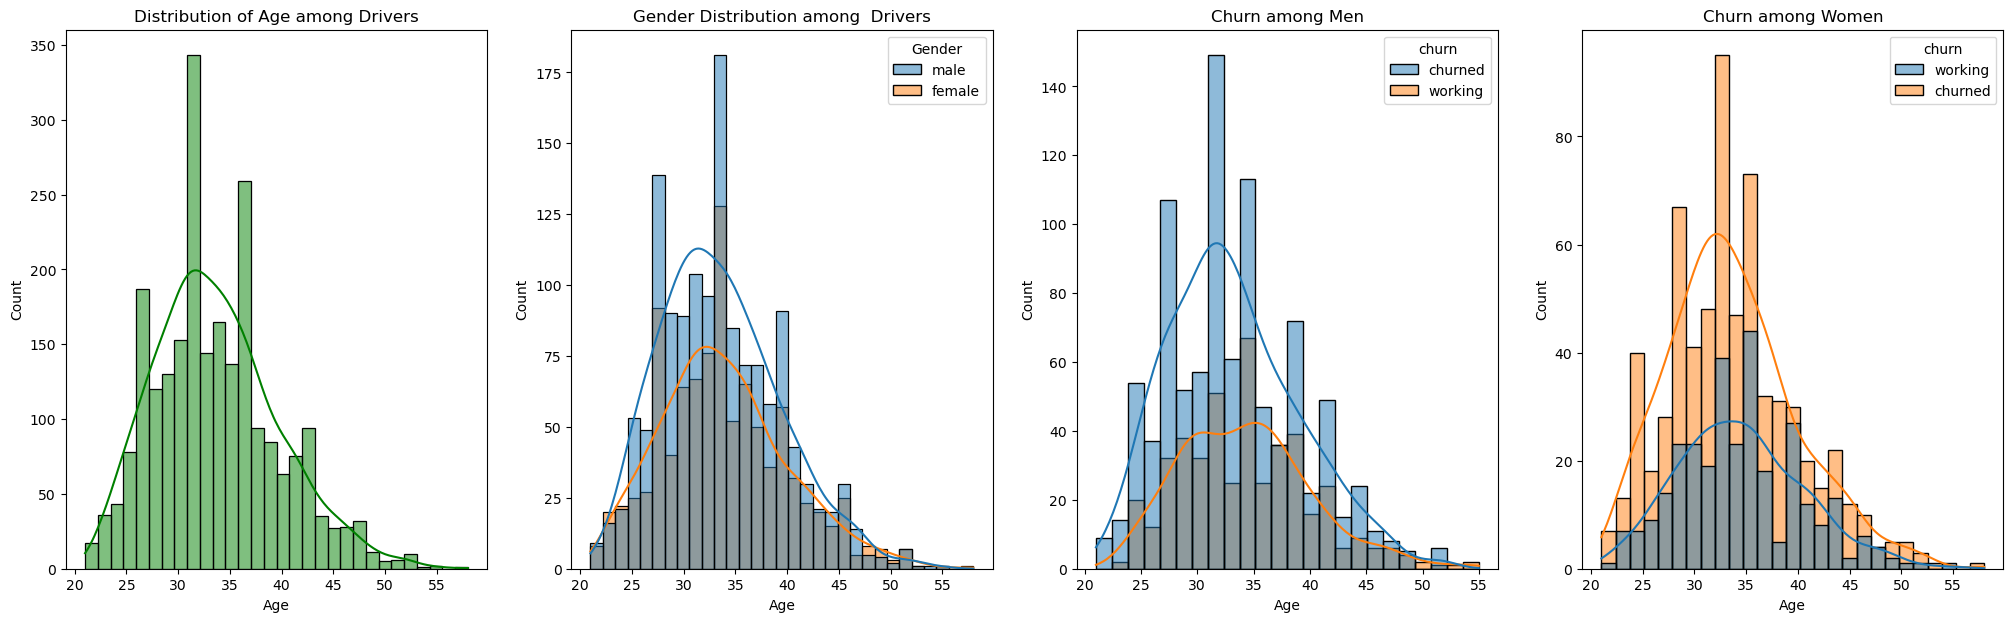

In [25]:
fig,ax=plt.subplots(1,4,figsize=(25,7))

sns.histplot(data=df,x='Age',bins=30,kde=True,color='g',ax=ax[0])
ax[0].set_title('Distribution of Age among Drivers')

sns.histplot(data=df,x='Age',kde=True,hue='Gender',ax=ax[1])
ax[1].set_title('Gender Distribution among  Drivers')

#sns.histplot(data=df,x='Age',bins=30,kde=True,color='g',ax=ax[1,0])

sns.histplot(data=df[df['Gender']=='male'],x='Age',kde=True,hue='churn',ax=ax[2])
ax[2].set_title('Churn among Men')
sns.histplot(data=df[df['Gender']=='female'],x='Age',kde=True,hue='churn',ax=ax[3])
ax[3].set_title('Churn among Women')

### Insights
- Most of the drivers fall in the age range of 25 to 40
- The disrtibution of age is consistent among both the genders
- Among both Males and Females churn is proportionate with the Age of drivers

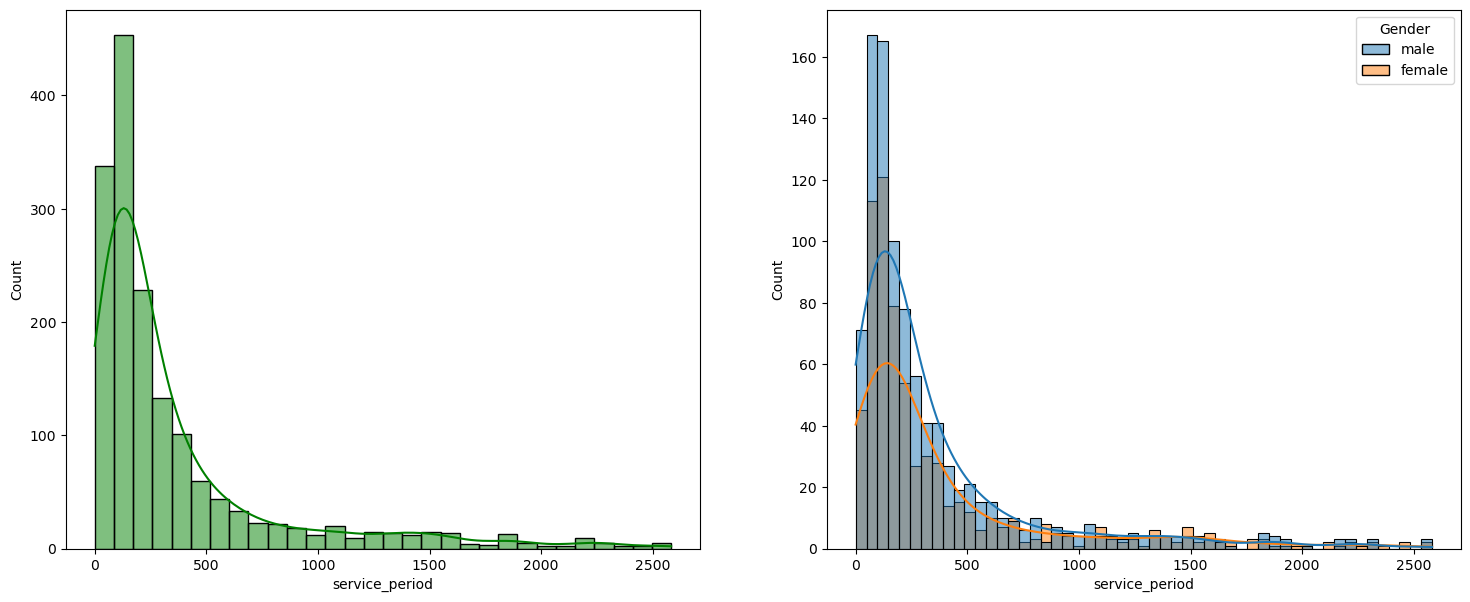

In [26]:
fig,axs=plt.subplots(1,2,figsize=(18,7))
plt.subplot(121)
sns.histplot(data=df,x='service_period',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='service_period',kde=True,hue='Gender')


plt.show()

### Insights
- the data is left skewed, showing that the service period of drivers is not normally distributed
- Most of the drivers tend to be within 300 days of service period, i.e. close to year
- Men have an average higher service period as compared to women
- the service period of women drivers in OLA also follows similar pattern to mens'

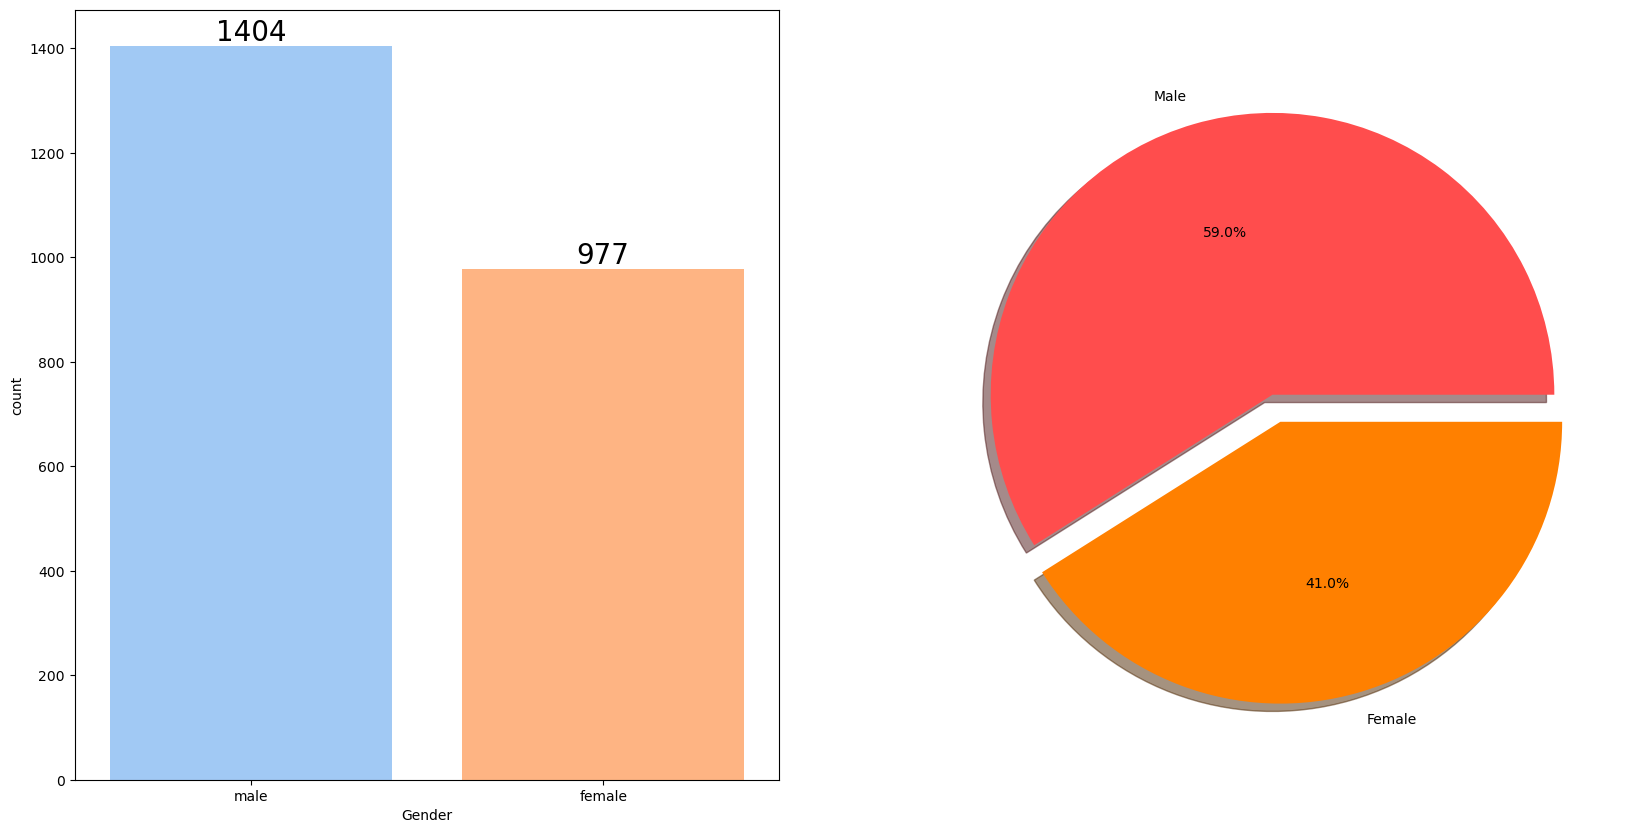

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
#plt.subplot(121)
sns.countplot(x=df['Gender'],data=df,palette='pastel',ax=ax[0],saturation=0.99)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

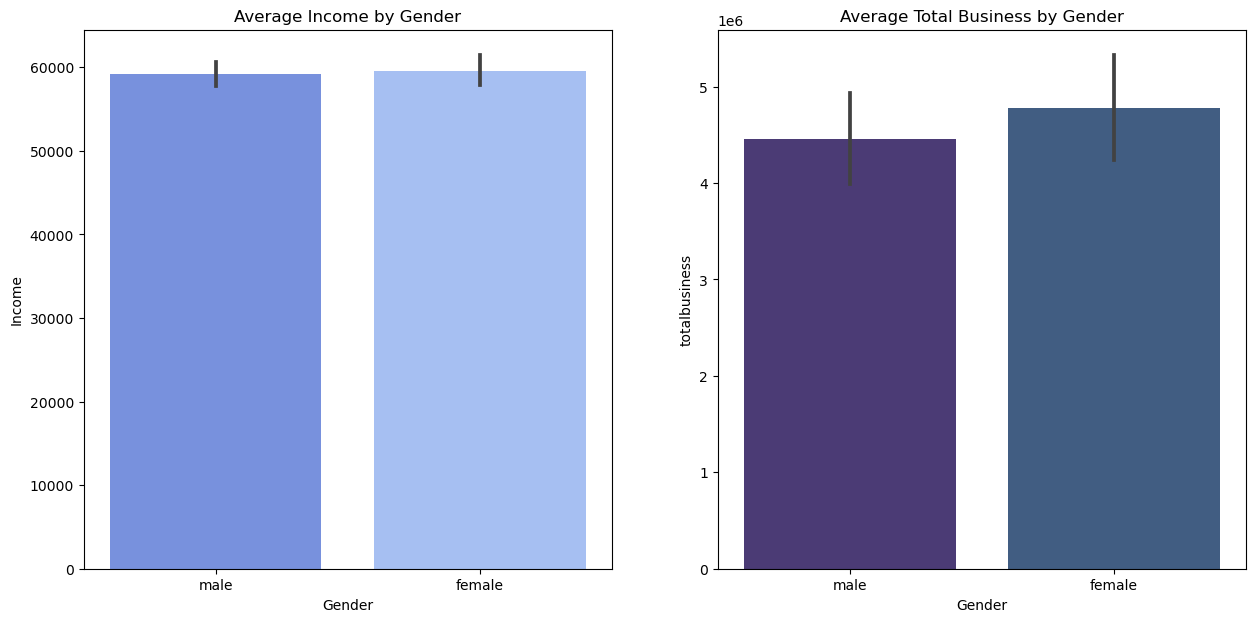

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Define custom color palettes
income_palette = sns.color_palette("coolwarm", as_cmap=False)
totalbusiness_palette = sns.color_palette("viridis", as_cmap=False)

# Plot average Income by Gender on the first subplot with custom palette
sns.barplot(data=df, x='Gender', y='Income', ax=axs[0], palette=income_palette)
axs[0].set_title('Average Income by Gender')

# Plot average totalbusiness by Gender on the second subplot with custom palette
sns.barplot(data=df, x='Gender', y='totalbusiness', ax=axs[1], palette=totalbusiness_palette)
axs[1].set_title('Average Total Business by Gender')

# Display the plots
plt.show()

As we can see that the Average Income and Total Business provided by both the genders is quite comparable with not much different among the two 

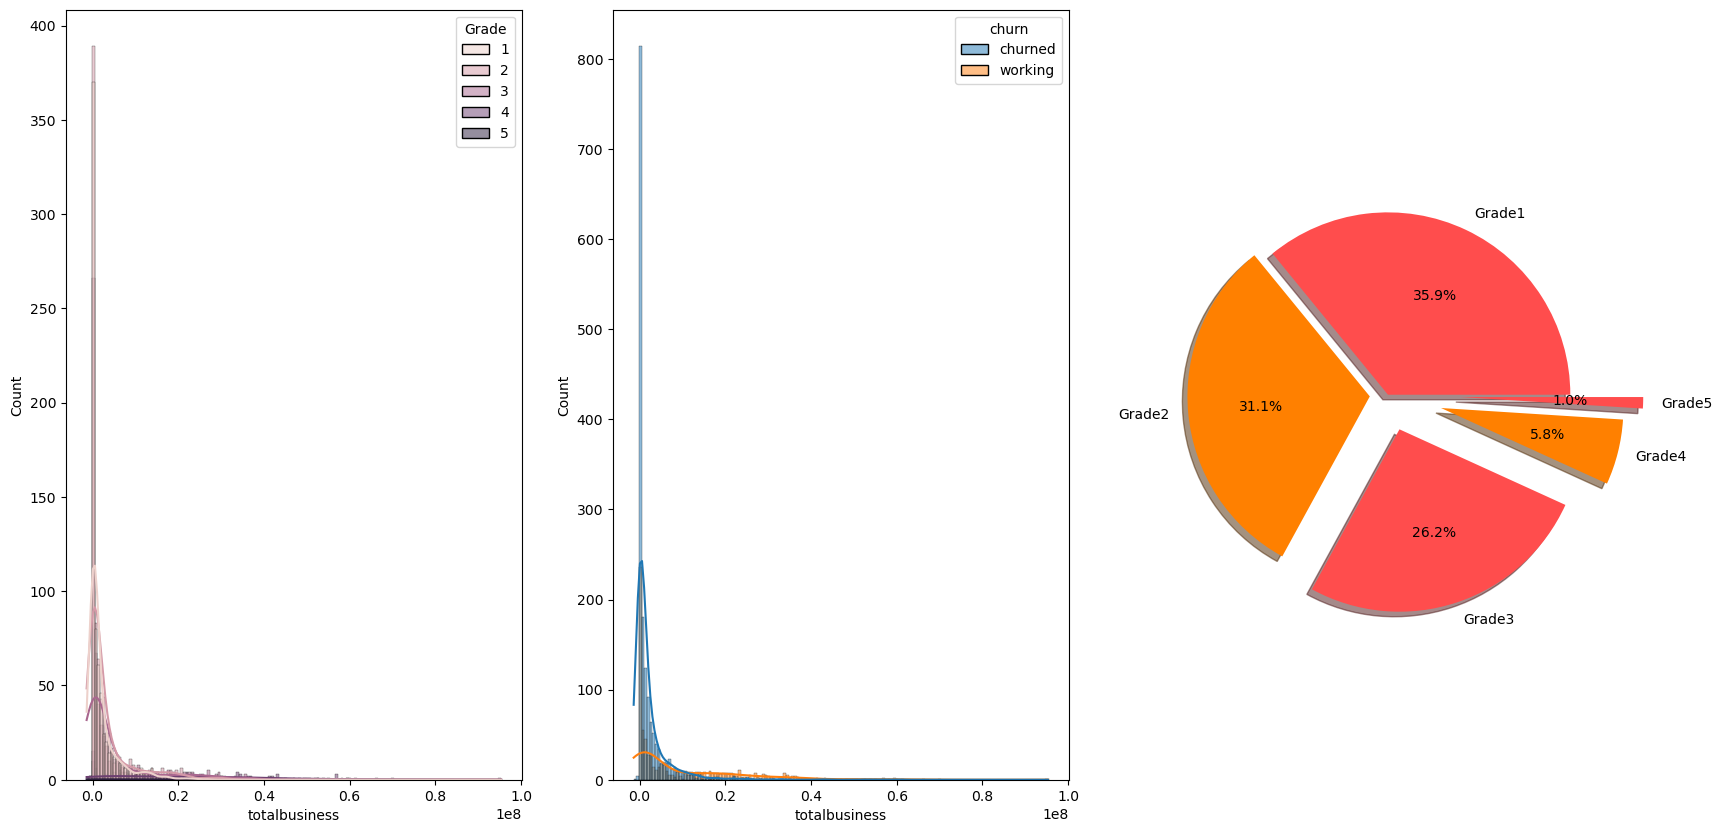

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x='totalbusiness',kde='True',hue='Grade')

plt.subplot(1,3,2)
sns.histplot(data=df,x='totalbusiness',kde='True',hue='churn')


plt.subplot(1,3,3)
plt.pie(x=df['Grade'].value_counts(),explode=[0,0.1,0.2,0.3,0.4],labels=['Grade1','Grade2','Grade3','Grade4','Grade5'],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


#### Insight

- Most of the business that OLA is getting is from Grade 1 & 2
- However, we notice that drivers from Grade 1 & 2 have the highest churn as well


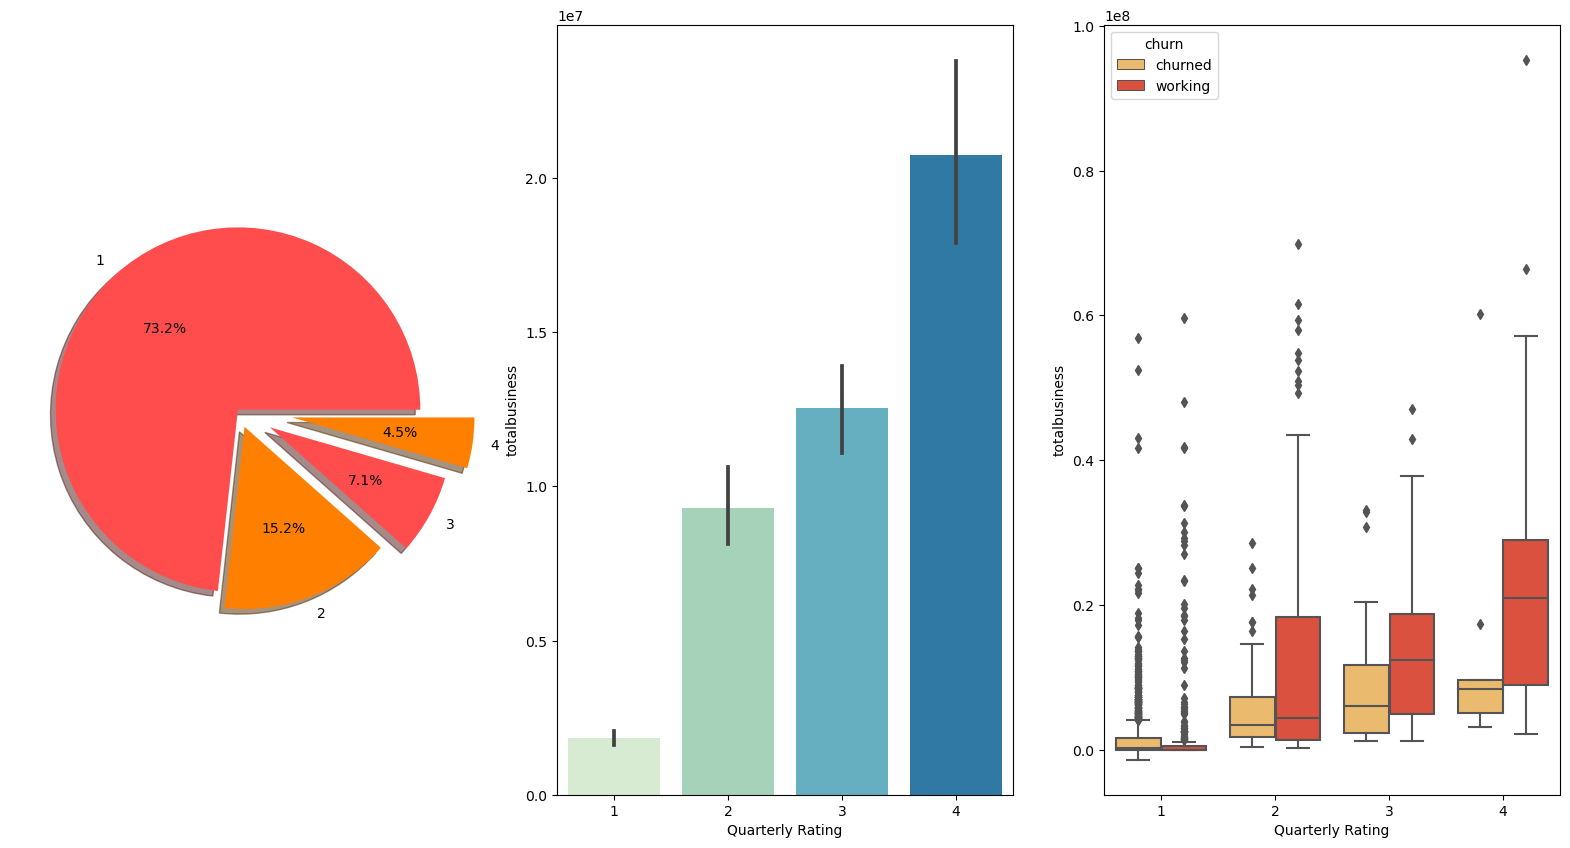

In [30]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.pie(x=df['Quarterly Rating'].value_counts(),explode=[0,0.1,0.2,0.3,],labels=['1','2','3','4'],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

plt.subplot(1,3,2)
sns.barplot(data=df,x='Quarterly Rating', y='totalbusiness',palette='GnBu')

plt.subplot(1,3,3)
sns.boxplot(data=df,x='Quarterly Rating', y='totalbusiness',hue='churn',palette='YlOrRd')

plt.show()




### Insights
- Most of the drivers are lower rated, around 2/3rd of drivers have 1 rating
- The drivers that are high rated are major cintributors in total business
- Churn is independent of Quarterly Rating of drivers or the business they are providing
- Drivers which are rated as 1 or 2 have higher outliers

## Feature Wise Visualization
### Bivariate Analysis(Does Gender has any impact on Churn)

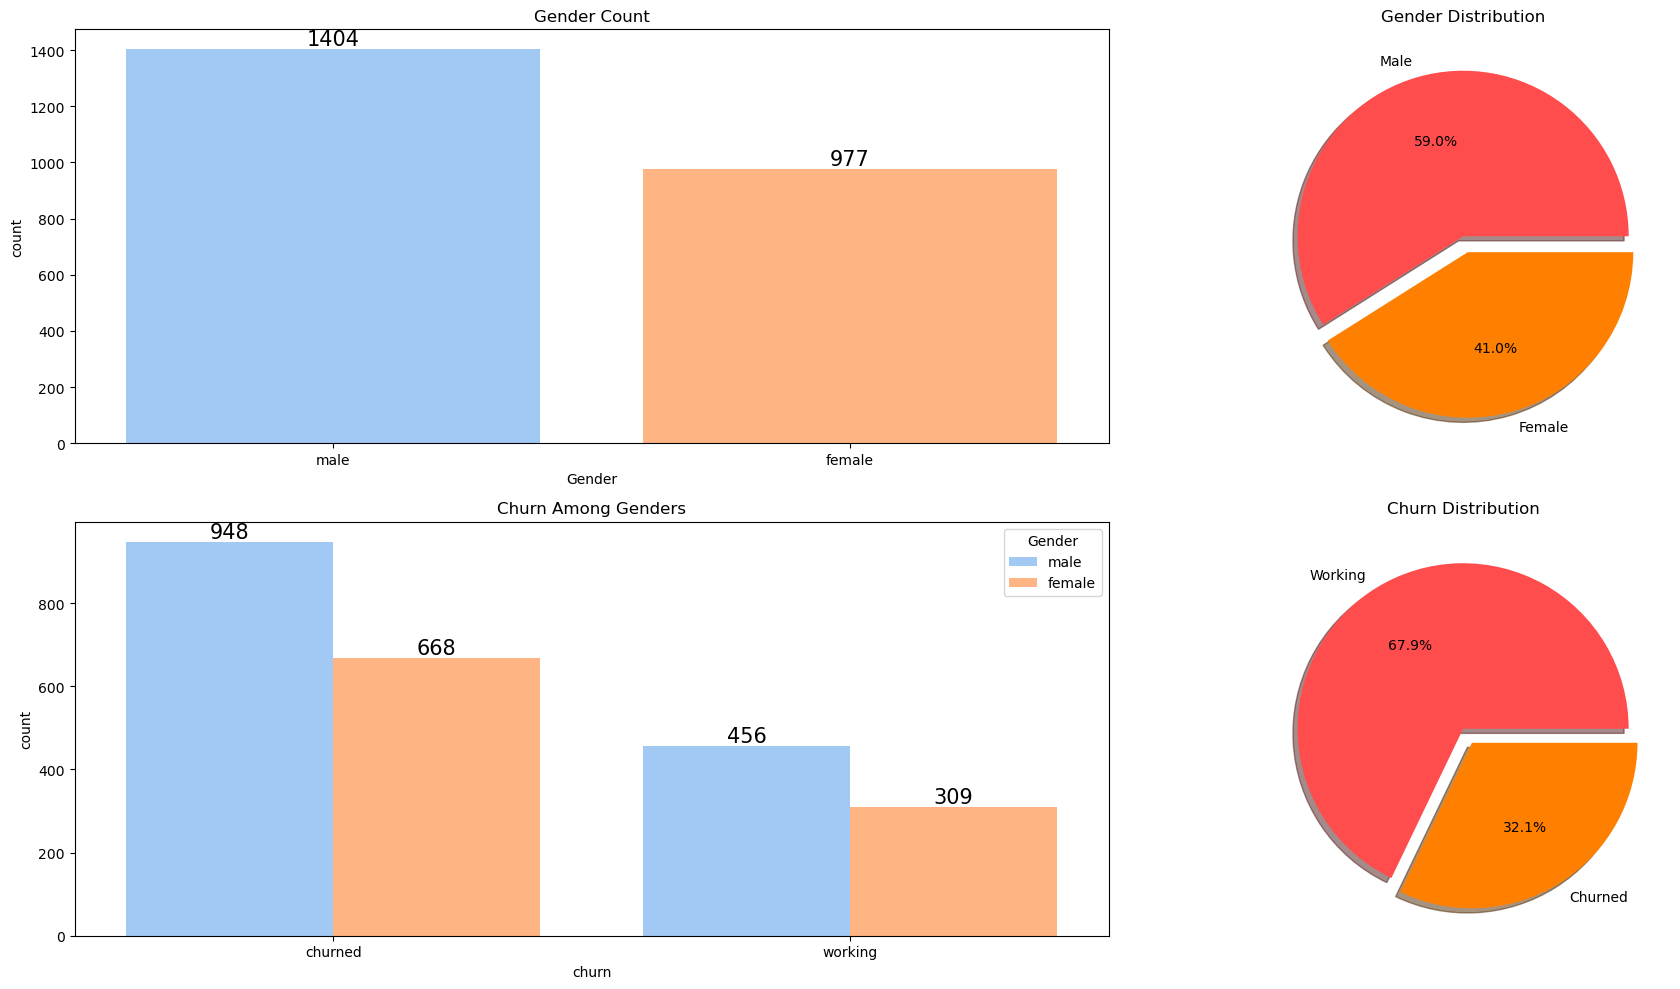

In [31]:
f, ax = plt.subplots(2, 2, figsize=(20, 10))

# First subplot: Countplot for Gender
sns.countplot(x='Gender', data=df, palette='pastel', ax=ax[0, 0], saturation=0.99)
for container in ax[0, 0].containers:
    ax[0, 0].bar_label(container, color='black', size=15)
    ax[0, 0].set_title('Gender Count')

# Second subplot: Pie chart for Gender
ax[0, 1].pie(df['Gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
ax[0, 1].set_title('Gender Distribution')

# Third subplot: Countplot for Churn with hue as Gender
sns.countplot(data=df, x='churn', palette='pastel', hue='Gender', ax=ax[1, 0], saturation=0.99)
for container in ax[1,0].containers:
    ax[1,0].bar_label(container,color='black',size=15)
    ax[1,0].set_title('Churn Among Genders')

# Fourth subplot: Pie chart for Churn
ax[1, 1].pie(df['churn'].value_counts(), labels=['Working', 'Churned'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
ax[1, 1].set_title('Churn Distribution')

# Display the plots
plt.tight_layout()
plt.show()

### Insights
- Men have higher employee count contributing to 59% of overall worker strength
- The number of employees churning away is higher than the ones that decided to stay with the company
- Among the churned employees as well men  have churned away in higher numbers

### City Column Bivariate Analysis

- How is City wise distribution of drivers
- Has City got to do anything with churn

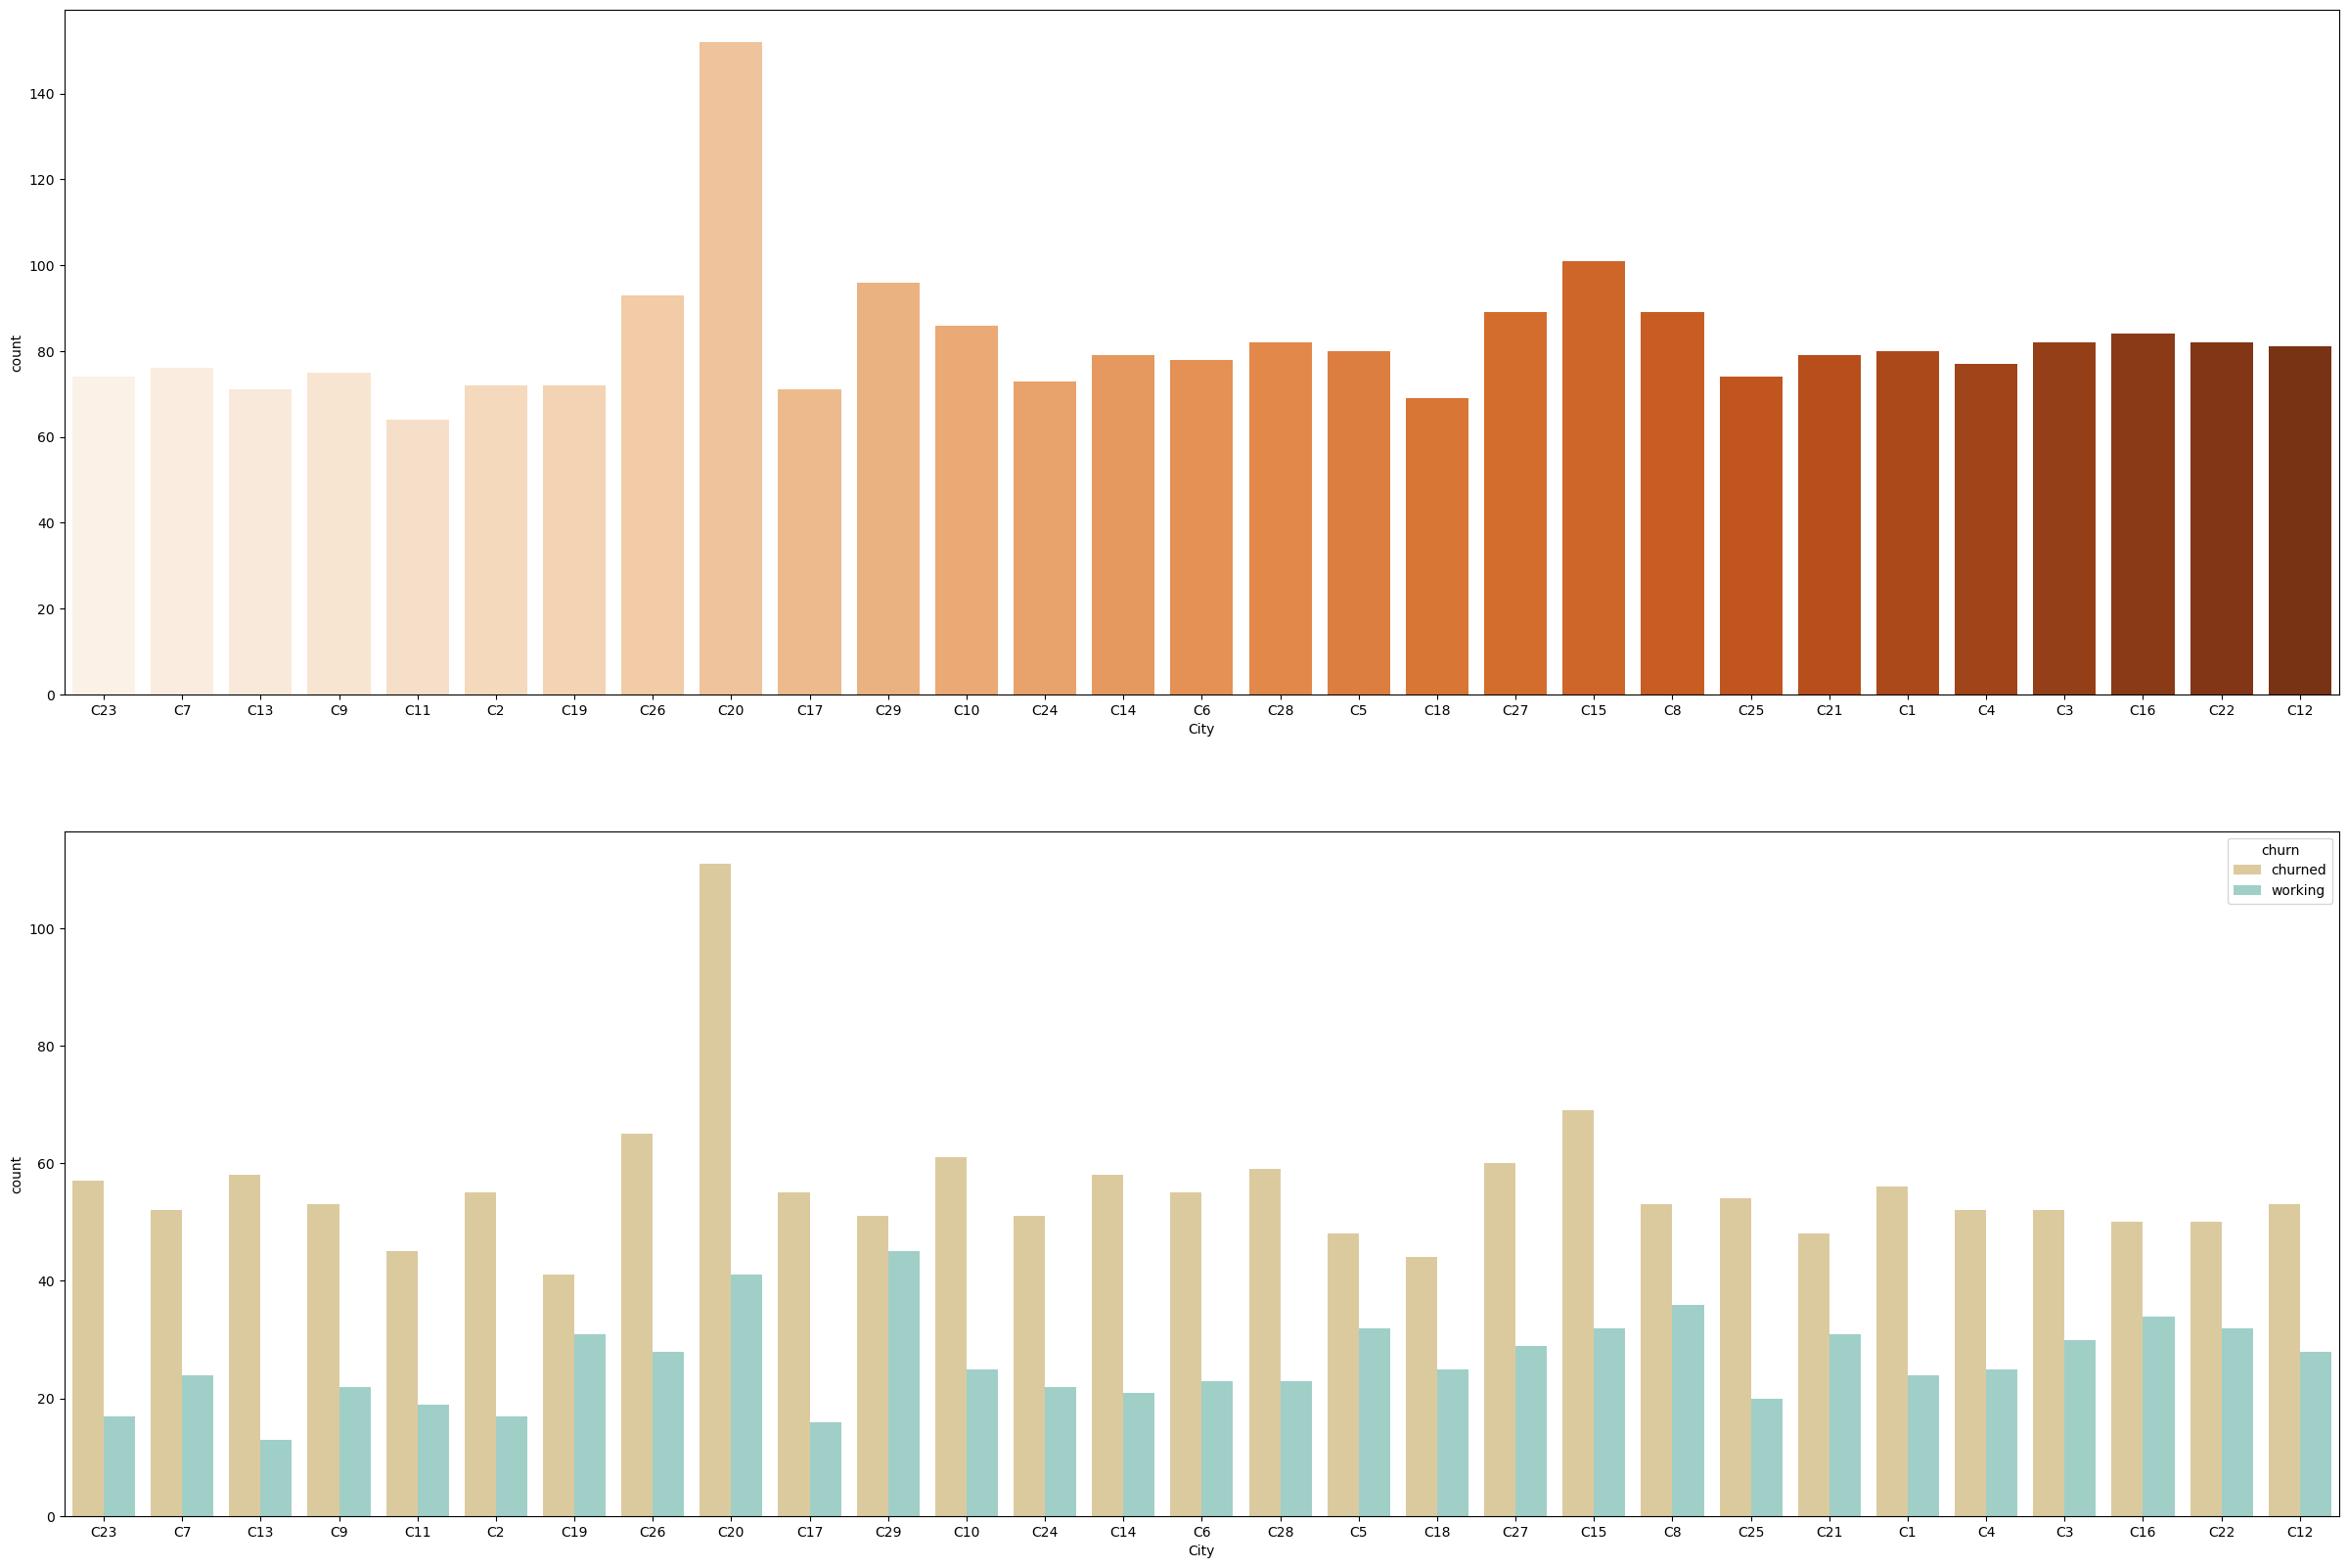

In [32]:
fig,ax=plt.subplots(2,1,figsize=(30,20))

sns.countplot(data=df,x='City',palette='Oranges',ax=ax[0])

sns.countplot(data=df,x='City',palette='BrBG',hue='churn',ax=ax[1])

plt.show()

### Insight
- The distribution of drivers in the various cities is mostly proportionate to the churn

### Checking if Cities have a relation with churn among drivers

In [33]:
from scipy.stats import chi2_contingency
contingency_table=pd.crosstab(df['City'],df['churn'])
chi2, p, dof, expected=chi2_contingency(contingency_table)

print("\nOverall Chi-square test")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

print('-'*30)

alpha = 0.05

# Conclude the test
if p < alpha:
    print("Churn and City are related (reject null hypothesis)")
else:
    print("Churn and City are not related (fail to reject null hypothesis)")


Overall Chi-square test
Chi-square statistic: 46.91717618985934
p-value: 0.013977549937173567
Degrees of freedom: 28
------------------------------
Churn and City are related (reject null hypothesis)


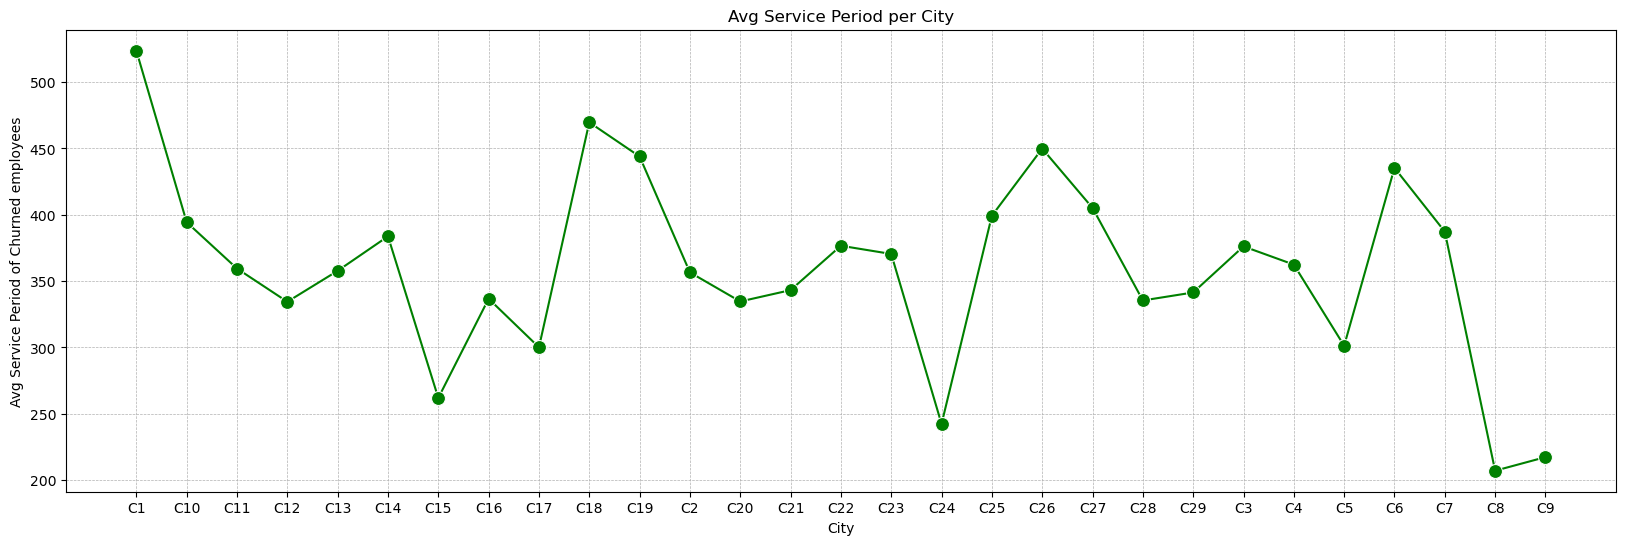

In [34]:
plt.figure(figsize=(20,6))
mean=df.groupby('City')['service_period'].mean().reset_index()
mean.columns=['City','Avg Service Period of Churned employees']
sns.lineplot(data=mean,x='City',y='Avg Service Period of Churned employees',marker='o',linestyle='-', markersize=10, linewidth=1.5,color='green')

plt.grid(True, linestyle='--', linewidth=0.5)
    
plt.title('Avg Service Period per City')
plt.show()

### Insights
- We can conclude that churn and City are related
- Which means there is higher churn among certain cities as compared to others
- This is also refelcted in the average service period which varies across the city

In [35]:
df['City'].unique()

array(['C23', 'C7', 'C13', 'C9', 'C11', 'C2', 'C19', 'C26', 'C20', 'C17',
       'C29', 'C10', 'C24', 'C14', 'C6', 'C28', 'C5', 'C18', 'C27', 'C15',
       'C8', 'C25', 'C21', 'C1', 'C4', 'C3', 'C16', 'C22', 'C12'],
      dtype=object)

### Income column 

- What is the income pattern of drivers
- Does Income has any relation with Churn

<Axes: xlabel='Income', ylabel='Count'>

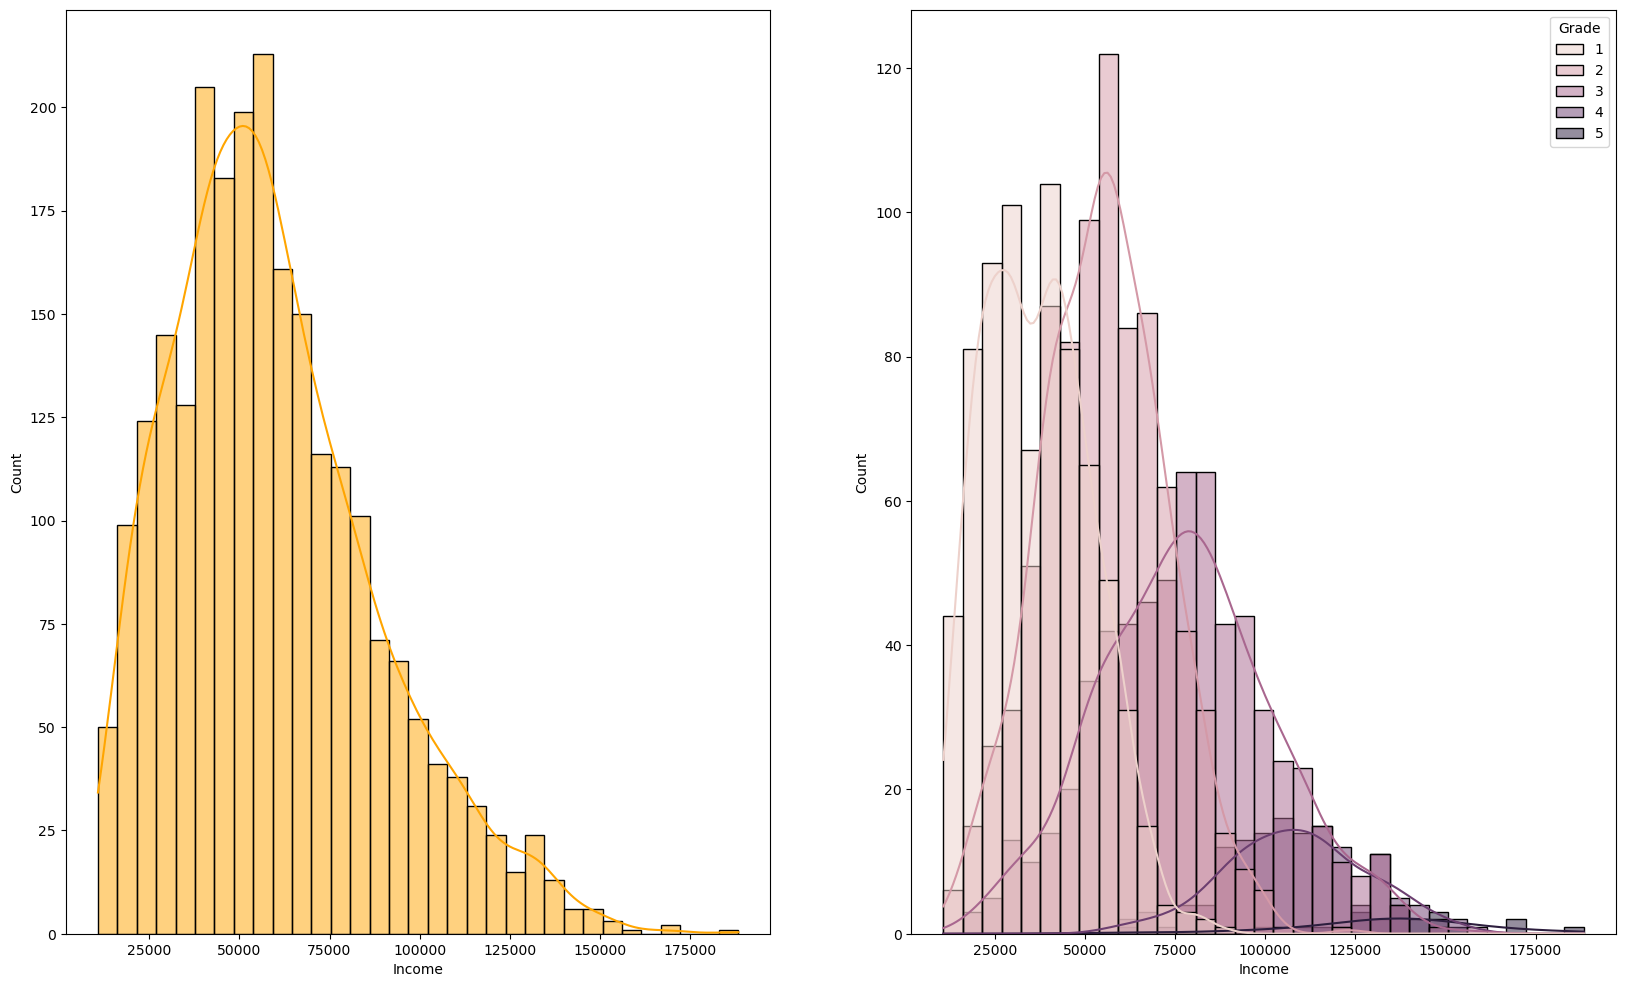

In [36]:
fig,ax=plt.subplots(1,2,figsize=(20,12))

sns.histplot(data=df,x='Income',kde=True,color='orange',ax=ax[0])

sns.histplot(data=df,x='Income',hue='Grade',kde=True,color='orange',ax=ax[1])


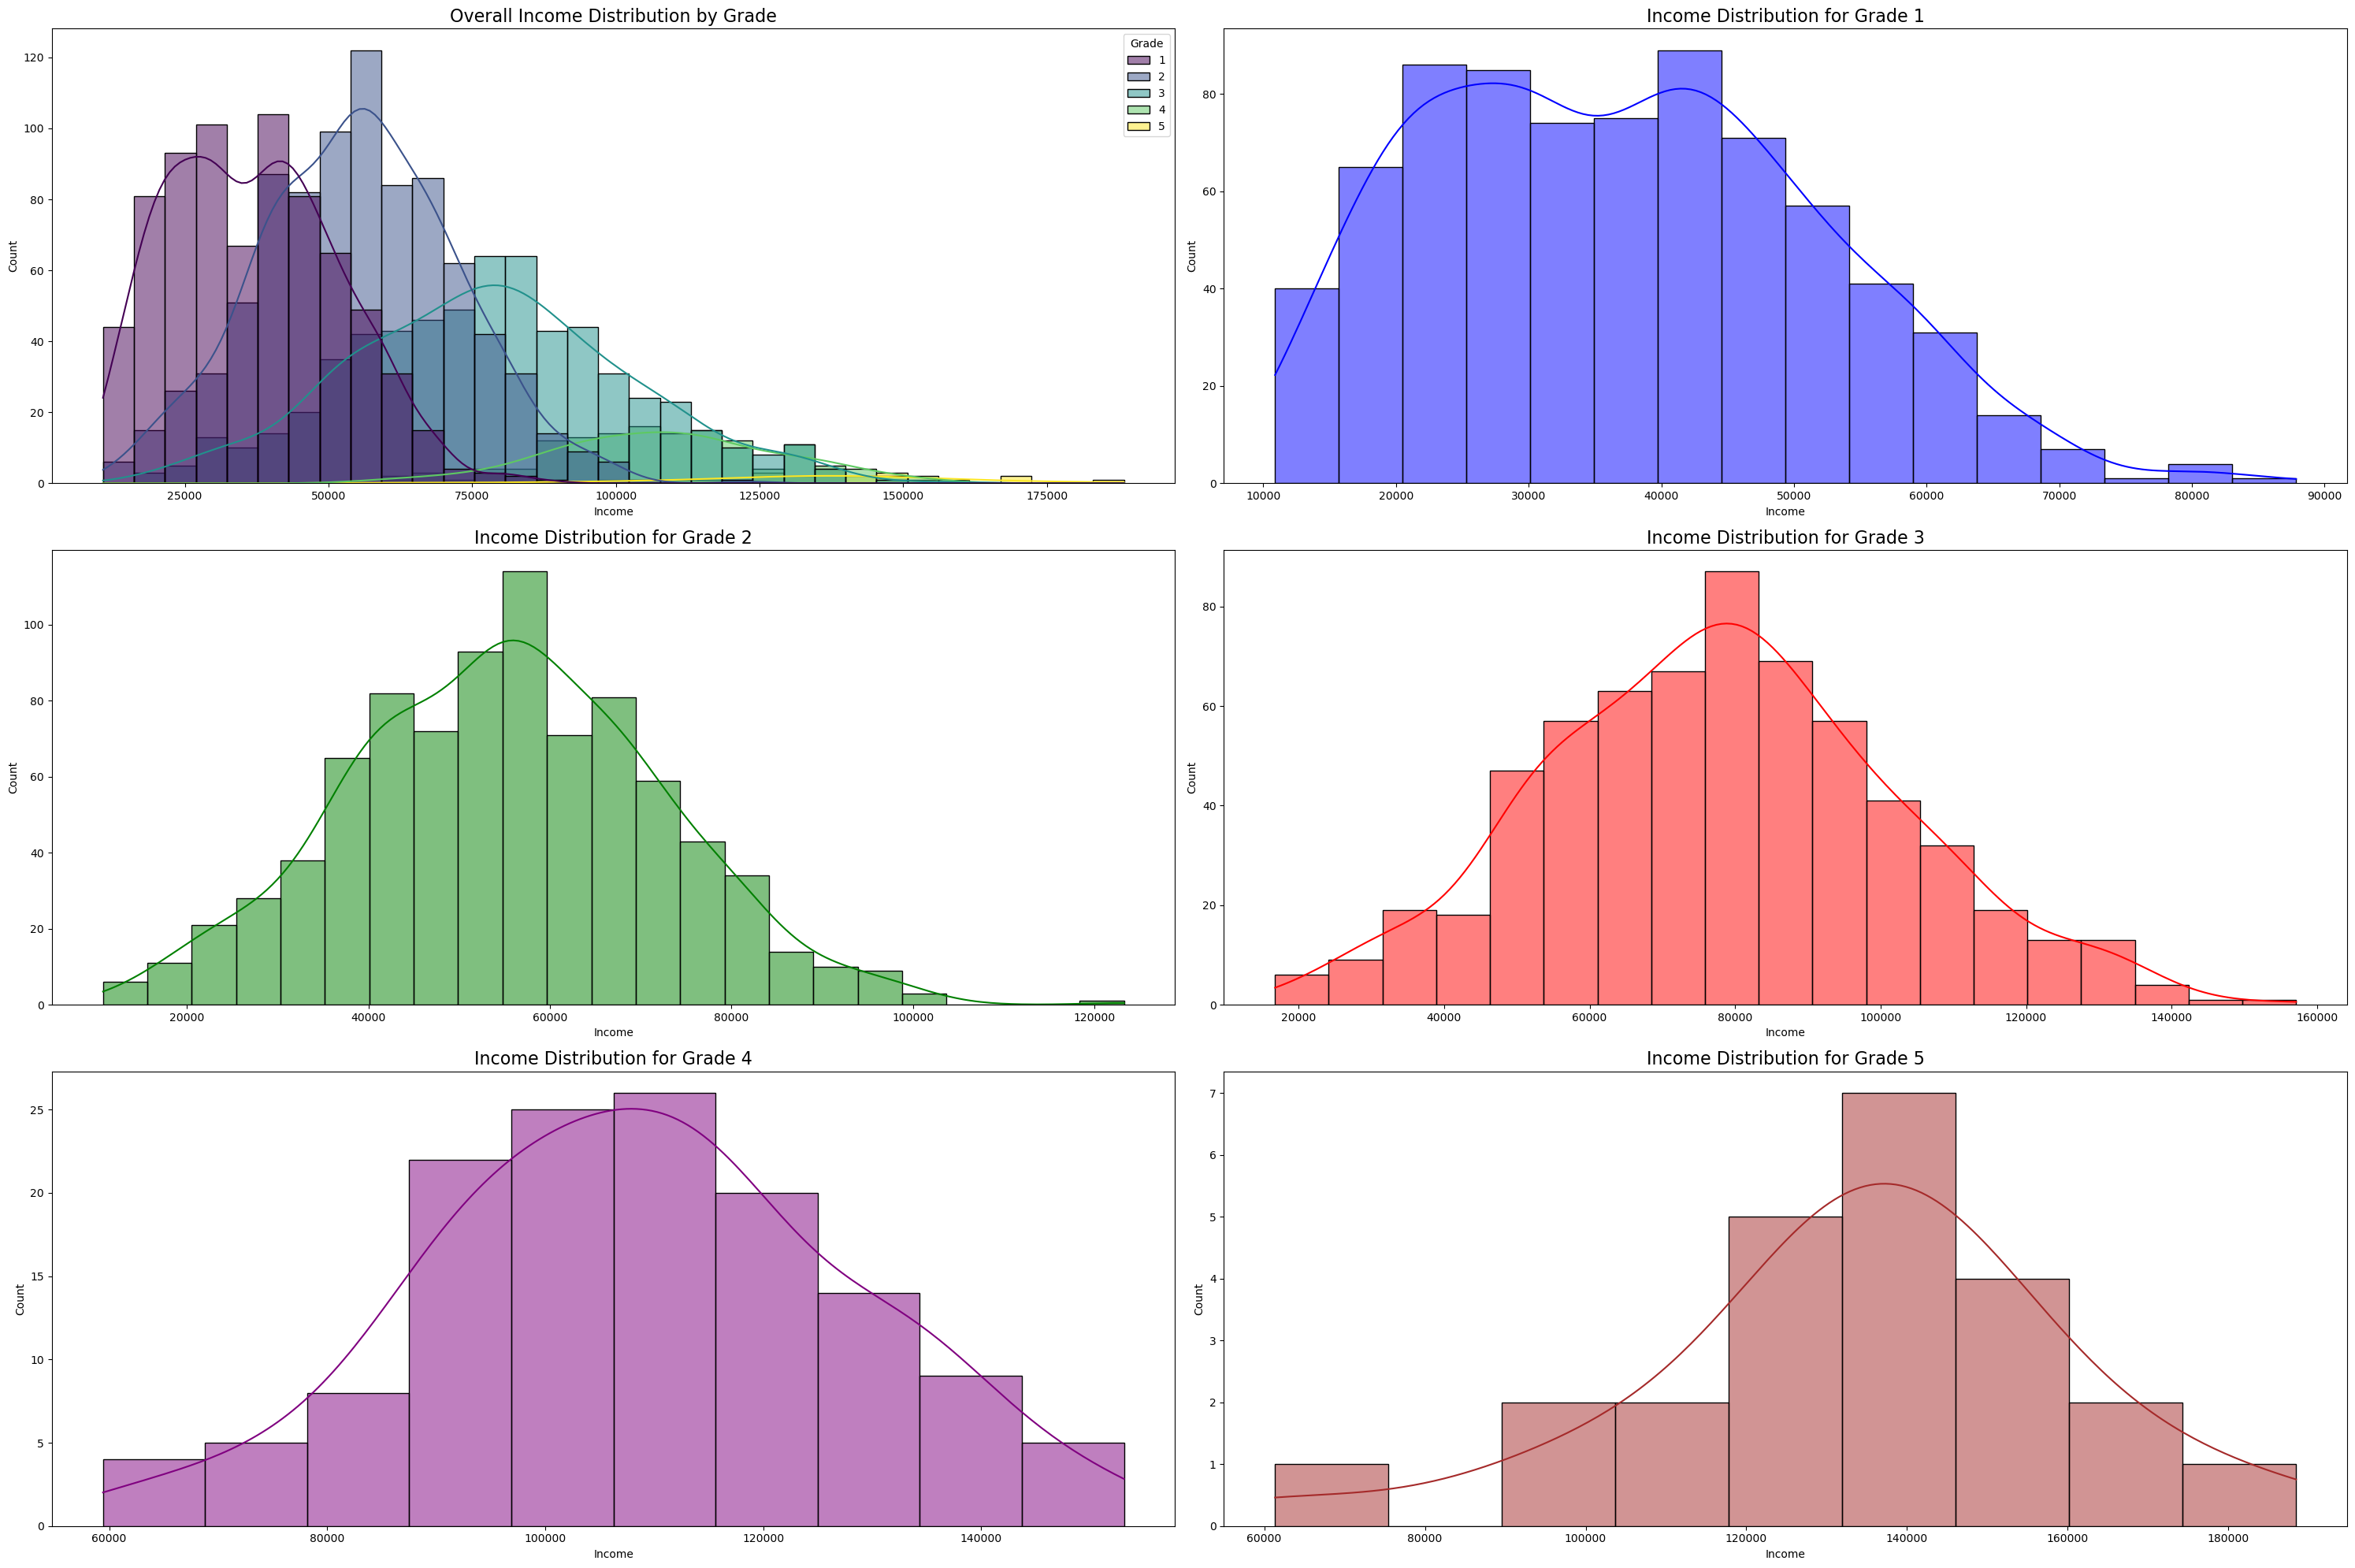

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the subplots
fig, ax = plt.subplots(3, 2, figsize=(30, 20))

# Overall income distribution with KDE and hue by Grade
sns.histplot(data=df, x='Income', hue='Grade', kde=True, palette='viridis', ax=ax[0, 0])
ax[0, 0].set_title('Overall Income Distribution by Grade', fontsize=16)

# Grade 1 distribution
sns.histplot(data=df[df['Grade'] == 1], x='Income', kde=True, color='blue', ax=ax[0, 1])
ax[0, 1].set_title('Income Distribution for Grade 1', fontsize=16)

# Grade 2 distribution
sns.histplot(data=df[df['Grade'] == 2], x='Income', kde=True, color='green', ax=ax[1, 0])
ax[1, 0].set_title('Income Distribution for Grade 2', fontsize=16)

# Grade 3 distribution
sns.histplot(data=df[df['Grade'] == 3], x='Income', kde=True, color='red', ax=ax[1, 1])
ax[1, 1].set_title('Income Distribution for Grade 3', fontsize=16)

# Grade 4 distribution
sns.histplot(data=df[df['Grade'] == 4], x='Income', kde=True, color='purple', ax=ax[2, 0])
ax[2, 0].set_title('Income Distribution for Grade 4', fontsize=16)

# Grade 5 distribution
sns.histplot(data=df[df['Grade'] == 5], x='Income', kde=True, color='brown', ax=ax[2, 1])
ax[2, 1].set_title('Income Distribution for Grade 5', fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Insights

- Most of the dirvers are earning between 25000 and 75000
- The salary of drivers have grade wise variance
- Apart from salaries of Grade 1 drivers, rest of the grades have normally distributed salaries
- Grade wise average salaries of drivers:
- 1) 6000
- 2) 6000
- 3) 8000
- 4) 11000
- 5) 14000

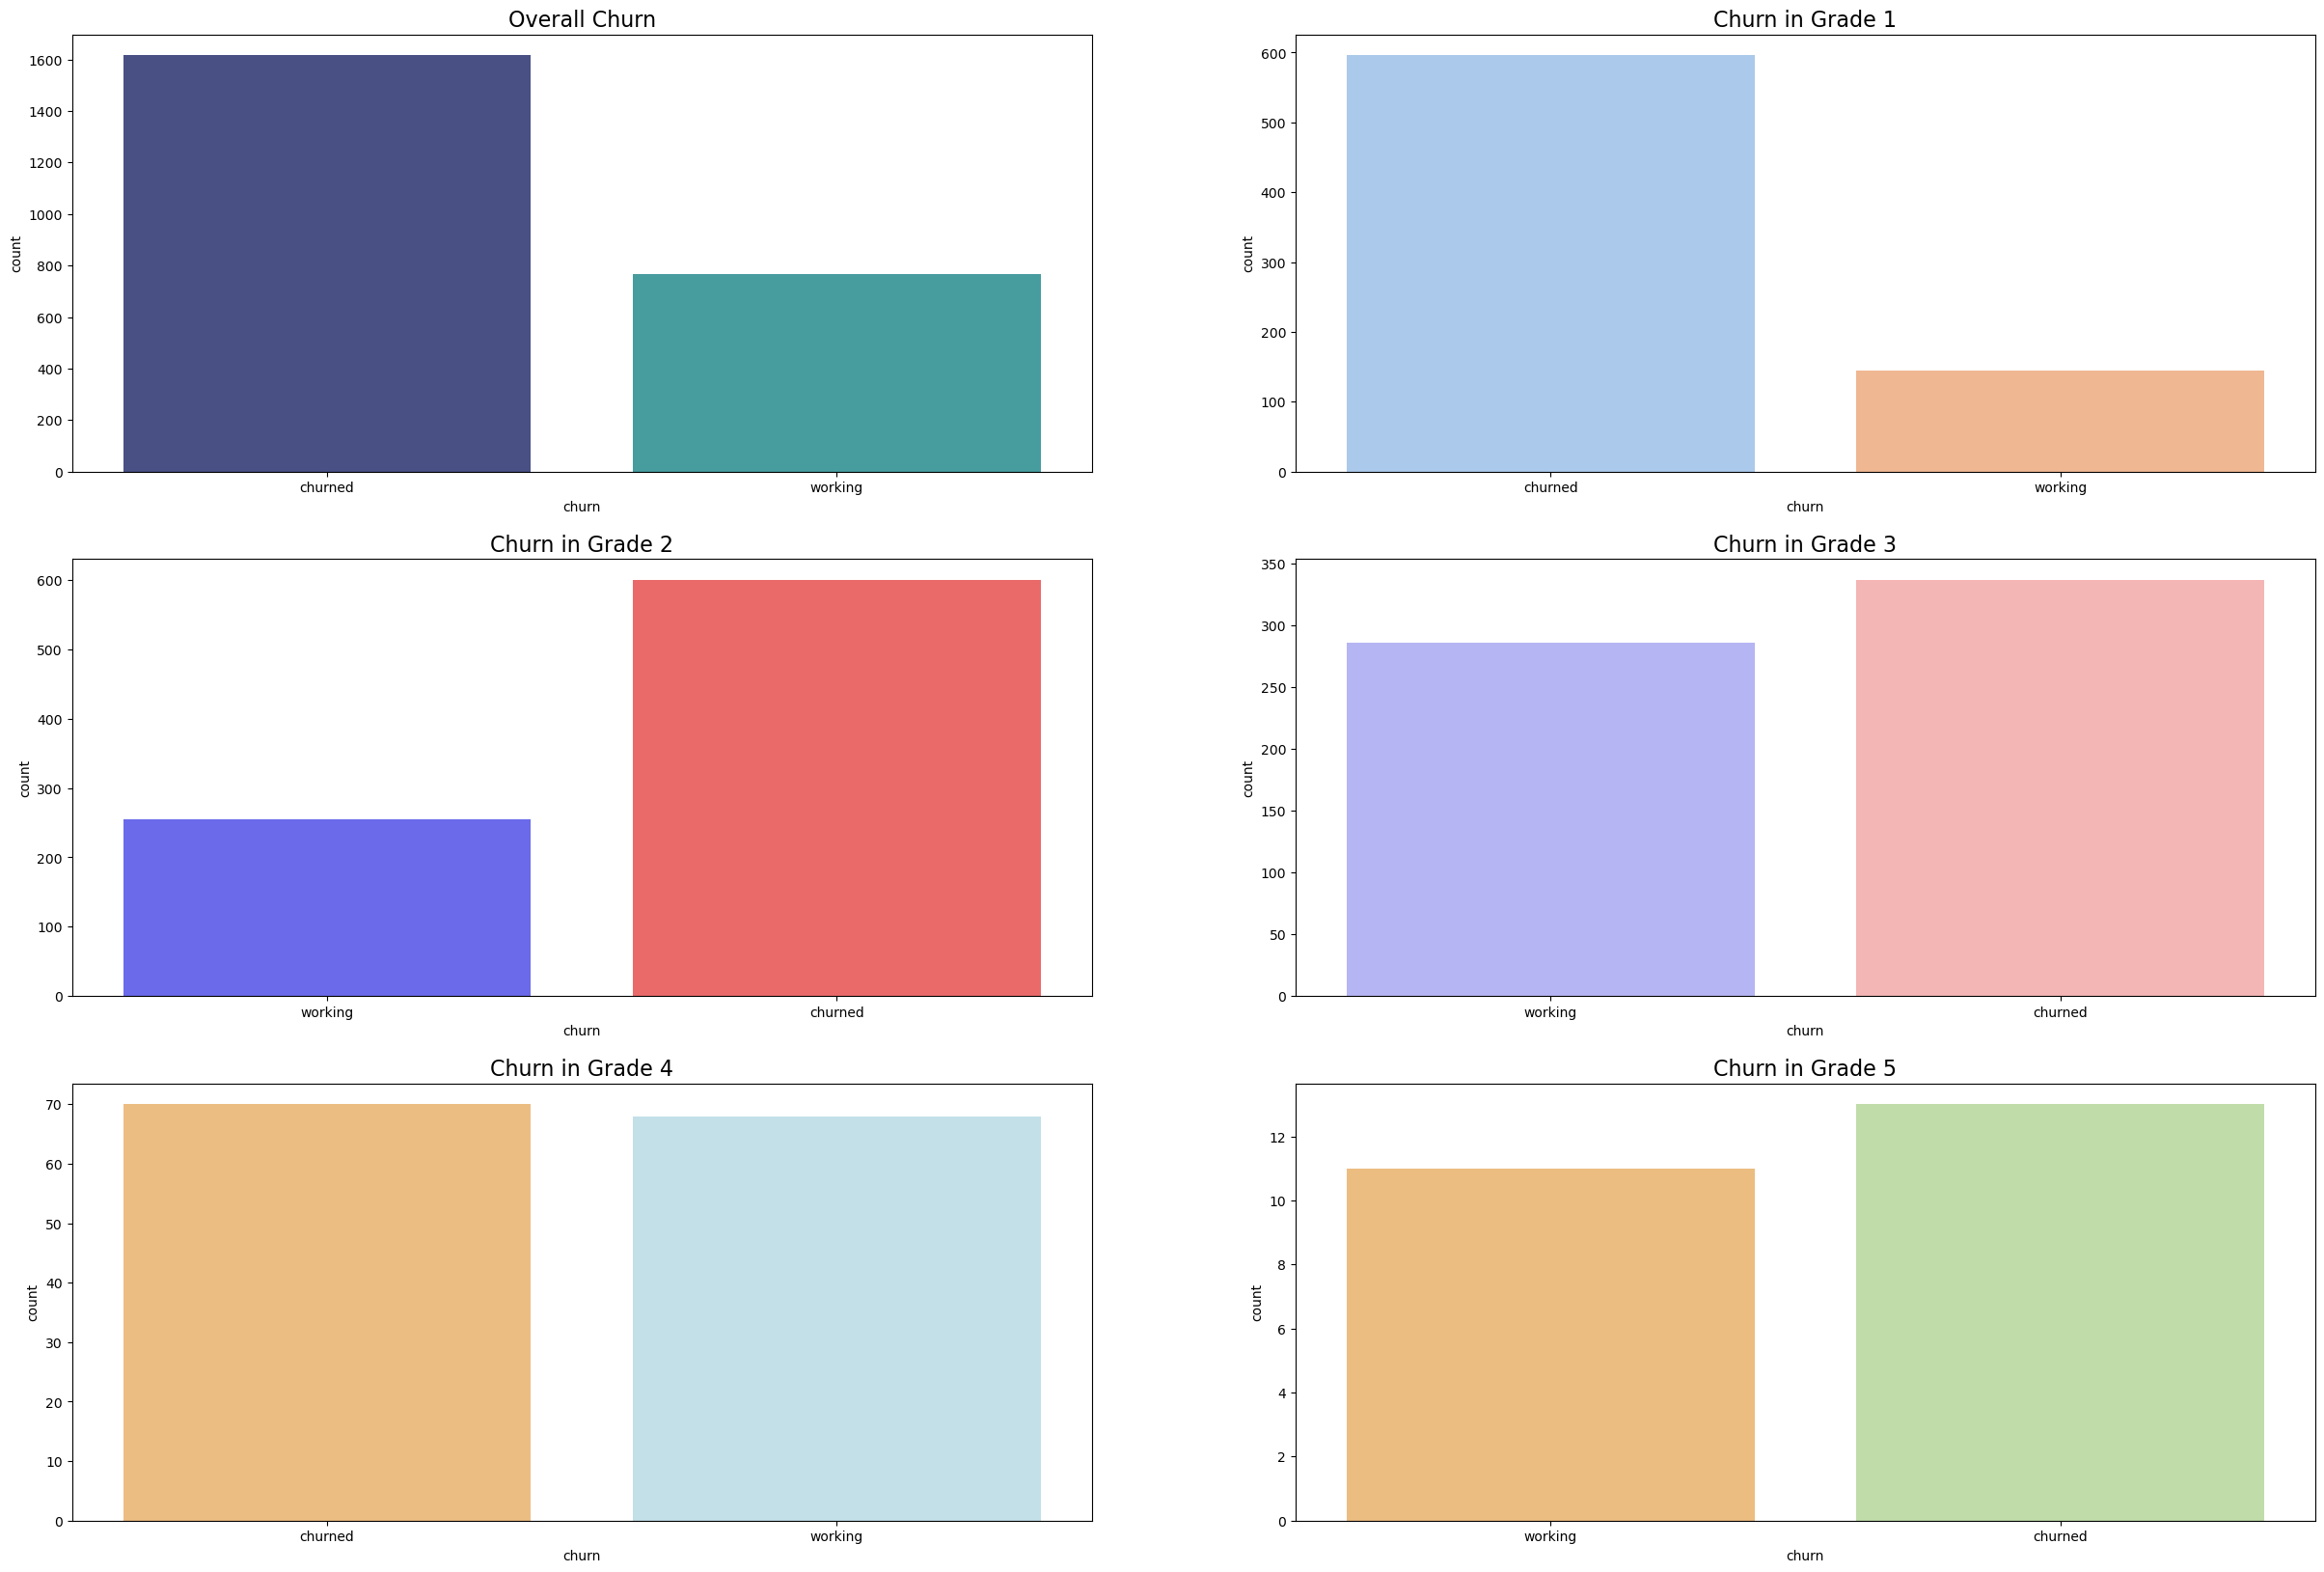

In [38]:
fig,ax=plt.subplots(3,2,figsize=(30,20))

sns.countplot(data=df,x='churn',palette='mako',ax=ax[0,0])
ax[0,0].set_title('Overall Churn',fontsize=16)

sns.countplot(data=df[df['Grade'].isin([1])],x='churn',palette='pastel',ax=ax[0,1])
ax[0,1].set_title('Churn in Grade 1',fontsize=16)

sns.countplot(data=df[df['Grade'].isin([2])],x='churn', palette='seismic',ax=ax[1,0])
ax[1,0].set_title('Churn in Grade 2',fontsize=16)

sns.countplot(data=df[df['Grade'].isin([3])],x='churn', palette='bwr',ax=ax[1,1])
ax[1,1].set_title('Churn in Grade 3',fontsize=16)

sns.countplot(data=df[df['Grade'].isin([4])],x='churn', palette='RdYlBu',ax=ax[2,0])
ax[2,0].set_title('Churn in Grade 4',fontsize=16)

sns.countplot(data=df[df['Grade'].isin([5])],x='churn',palette='Spectral',ax=ax[2,1])
ax[2,1].set_title('Churn in Grade 5',fontsize=16)

plt.show()

### Insights
 - there is higher churn among the drivers of Grade 1 & Grade 2 who are comparitively on lower salary ranges
 - Grade 4 has the most balanced churn among various grades
 - Although drivers of Grade 5 are highest paid we still find a similer churn with Grade 3
 - We cannot conclusively tell whether Grade has  a relationship with churn

### To statistically test the above hyptothsis that whether Grade and Salaries have any relationship with Churn we perform a chi2_continigency test 

### Chi2 _contingency test  assesses whether the observed frequencies in the contingency table (cross-tabulation of grade and churn status) differ significantly from the frequencies that would be expected if the two variables were independent.

#### Chi2_contingency test for Grade

In [39]:
#H0: There is no realtion between Grade of a driver and Churn
#Ha: There is relationship between Grade of a driver and Churn

from scipy.stats import chi2_contingency

#selcting columns for chi2 test
selected_columns=['Grade','churn']

#creating a contingency table
contingency_table=pd.crosstab(df[selected_columns[0]],df[selected_columns[1]])

#perform chi2 test
chi2, p, dof, expected=chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 130.60164814676116
p-value: 2.8955519930847994e-27
Degrees of freedom: 4
Expected frequencies table:
[[502.92146157 238.07853843]
 [580.29399412 274.70600588]
 [422.83410332 200.16589668]
 [ 93.66148677  44.33851323]
 [ 16.28895422   7.71104578]]


In [40]:
# Interpret the results
alpha = 0.05
if p < alpha:
    print("Churn and Grade are  related (reject null hypothesis)")
else:
    print("Churn and Grade are not related (fail to reject null hypothesis)")

Churn and Grade are  related (reject null hypothesis)


In [41]:
# Filter the DataFrame where drivers have churned
churned = df[df['churn'] == 'churned']

# Group by 'Grade' and count occurrences
churned_count = churned['Grade'].value_counts()

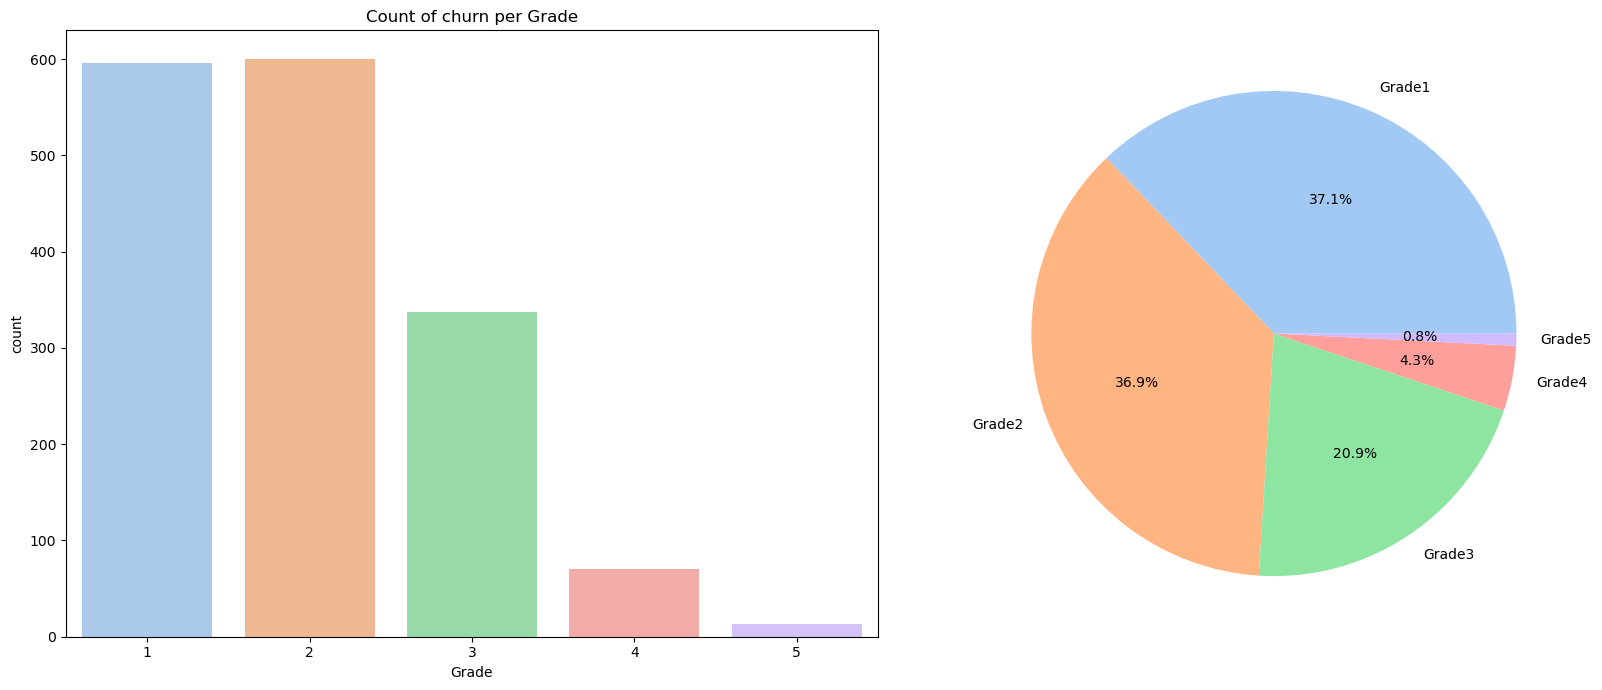

In [42]:
fig,ax=plt.subplots(1,2, figsize=(17,7))


# Plot the countplot (for comparison)
sns.countplot(data=churned, x='Grade', palette='pastel',ax=ax[0])
ax[0].set_title('Count of churn per Grade')
#plt.title('Count of Grades where Churn = 1')


# Plot the pie chart
ax[1].pie(churned_count, labels=['Grade1','Grade2','Grade3','Grade4','Grade5'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.tight_layout()
plt.show()


#### Chi2_contingency test for Income

In [43]:
#H0: There is no realtion between Salary of a driver and Churn
#Ha: There is relationship between Salary of a driver and Churn

#selecting columns for chi2 test
selected_columns=['Income','churn']

#creating a contingency table
contingency_table_salary=pd.crosstab(df[selected_columns[0]],df[selected_columns[1]])

#performing chi2 test
chi2,p,dof,expecteed=chi2_contingency(contingency_table_salary)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 2353.4851436614254
p-value: 0.40683311833250424
Degrees of freedom: 2338
Expected frequencies table:
[[502.92146157 238.07853843]
 [580.29399412 274.70600588]
 [422.83410332 200.16589668]
 [ 93.66148677  44.33851323]
 [ 16.28895422   7.71104578]]


In [44]:
# Interpret the results
alpha = 0.05
if p < alpha:
    print("Churn and Income are  related (reject null hypothesis)")
else:
    print("Churn and Income are not related (fail to reject null hypothesis)")

Churn and Income are not related (fail to reject null hypothesis)


### Insights:
- We can conclusively say that Churn and Grade a related:
- 1.)There is higher churn among the employees of Grades 1 & 2 which declines as we move towards Grade 5
- 2.) Grade 1 and Grade 2 contribute to 74% of the overall churn

- However, churn and Income are not related. As we can see the salaries of drivers show a uniform distribution among grades yet there is churn

## Promotion (Current Grade vs JoiningDesignation)
### Does promotion has any realtionship with churn

In [45]:
promoted=[]

for index,row in df.iterrows():
    if row['Grade']>row['Joining Designation']:
        promoted.append(1)
    else:
        promoted.append(0)
        
df['promoted']=promoted

df['promoted']=df['promoted'].map({0:'Not Promoted',1:'Promoted'})
    

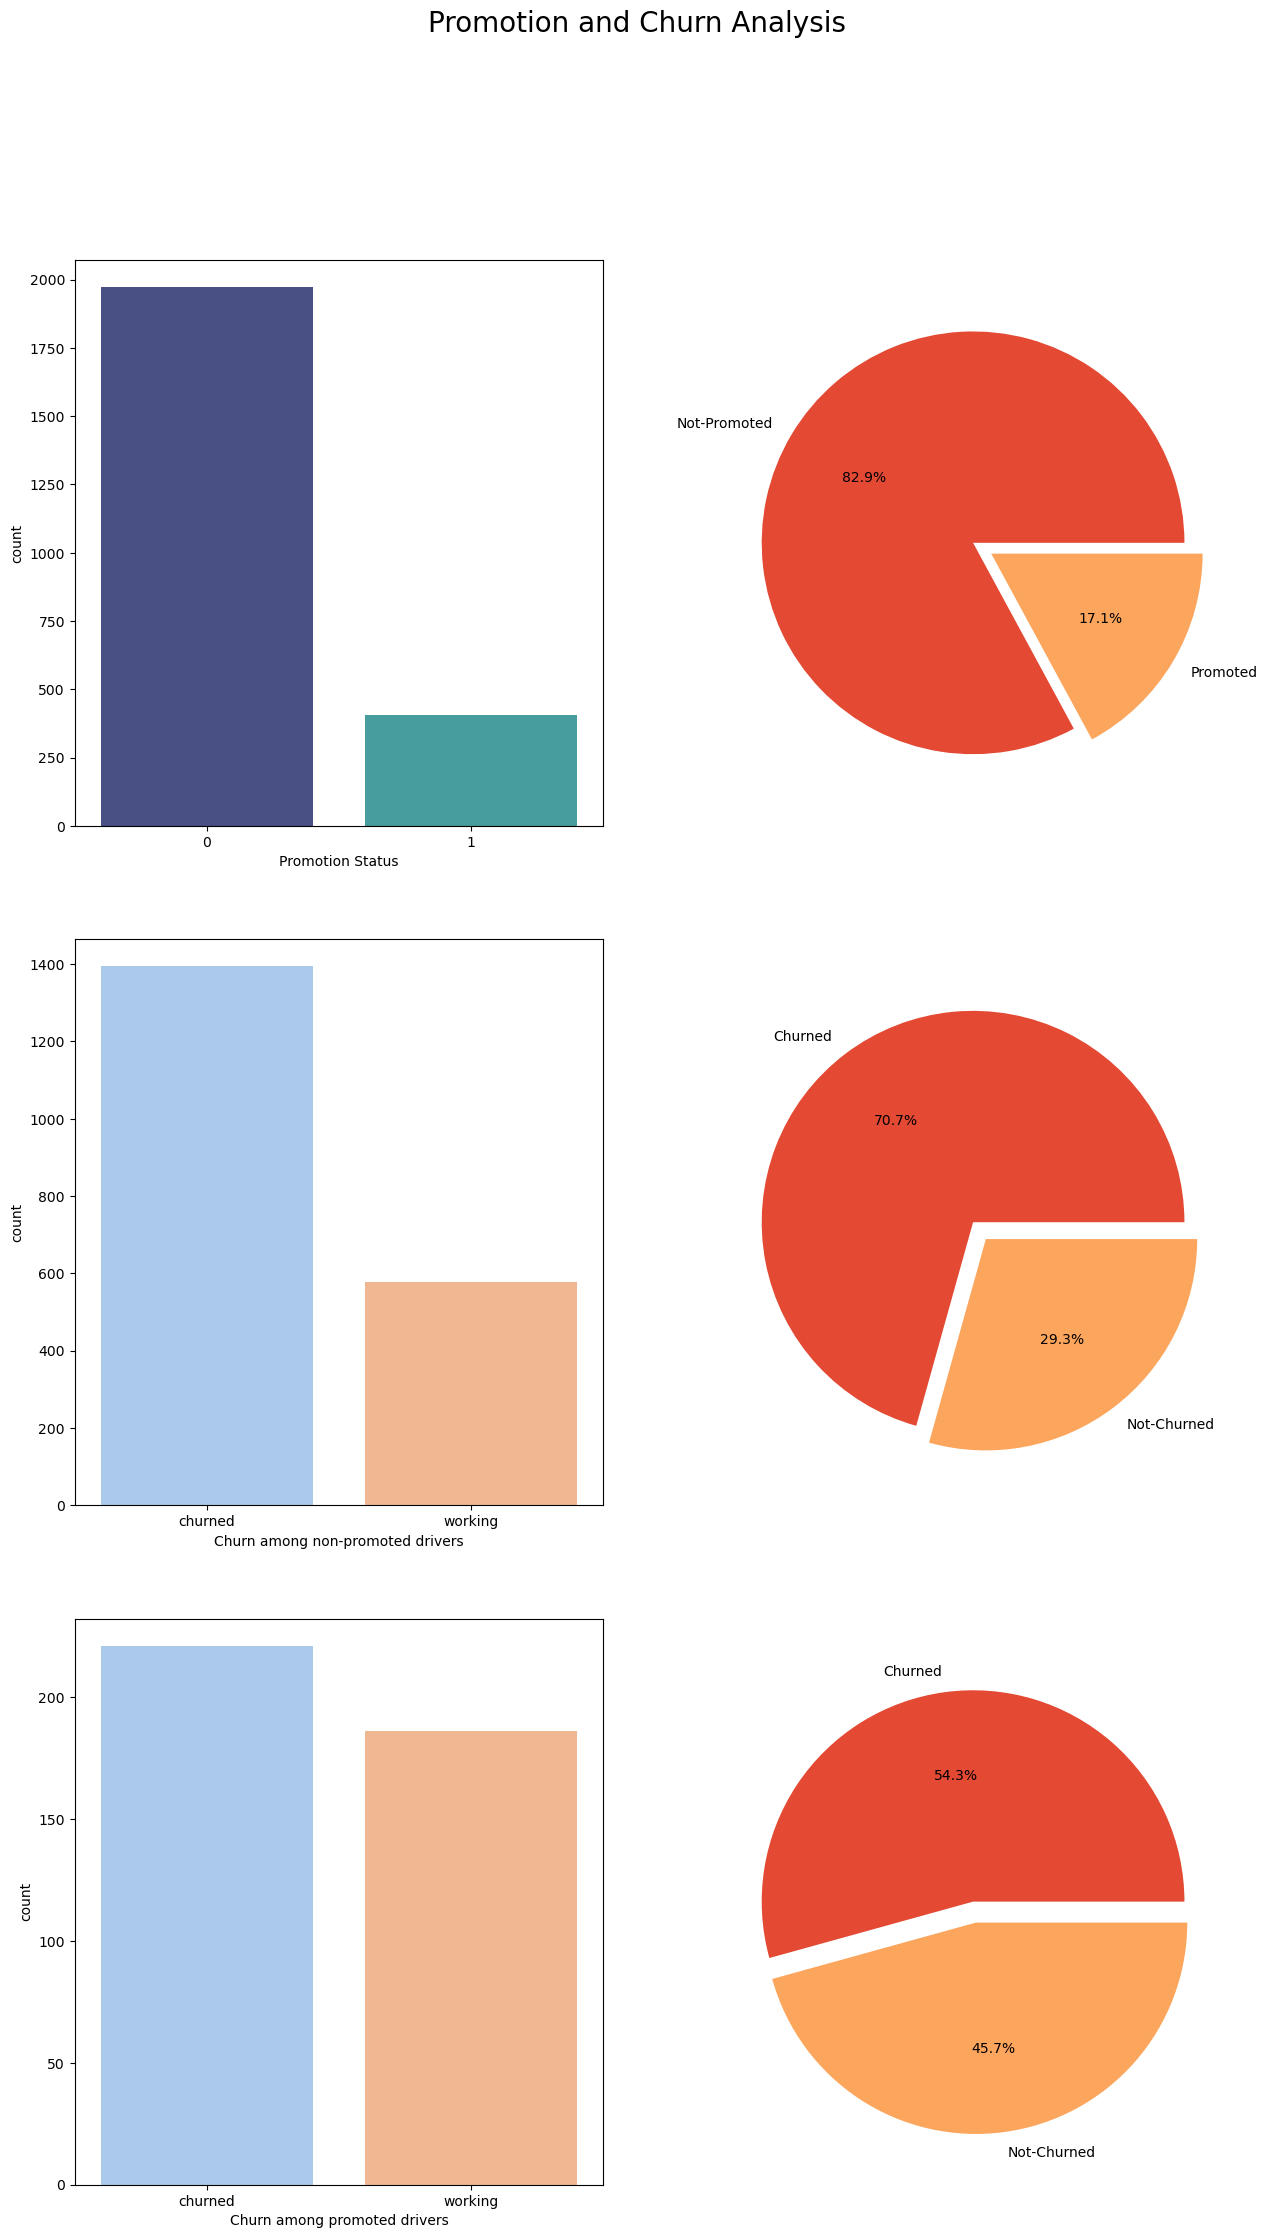

In [46]:
#promotion status of employees
fig,ax=plt.subplots(3,2,figsize=(15,25))

fig.suptitle('Promotion and Churn Analysis', fontsize=20)

sns.countplot(data=df,x=promoted,dodge='False',palette='mako',ax=ax[0,0])
ax[0,0].set_xlabel('Promotion Status')


ax[0,1].pie(df['promoted'].value_counts(),labels=['Not-Promoted','Promoted'],autopct='%2.1f%%', colors=sns.color_palette('RdYlBu'),explode=[0,0.1])

# churn among non-promoted members
sns.countplot(data=df[df['promoted']=='Not Promoted'],x='churn',dodge='False',palette='pastel',ax=ax[1,0])
ax[1,0].set_xlabel('Churn among non-promoted drivers')

nonpromoted_df = df[df['promoted'] == 'Not Promoted']

ax[1,1].pie(nonpromoted_df['churn'].value_counts(), labels=['Churned','Not-Churned'], autopct='%2.1f%%',
          colors=sns.color_palette('RdYlBu'),explode=[0,0.1])

#churn among promoted members
sns.countplot(data=df[df['promoted']=='Promoted'],x='churn',dodge='False',palette='pastel',ax=ax[2,0])
ax[2,0].set_xlabel('Churn among promoted drivers')

promoted_df = df[df['promoted'] == 'Promoted']

ax[2,1].pie(promoted_df['churn'].value_counts(), labels=['Churned','Not-Churned'], autopct='%2.1f%%',
          colors=sns.color_palette('RdYlBu'),explode=[0,0.1])

plt.show()

### Insights
- Out of the entire corpus of employees only 17% received promotion.
- There is a very high churn(70.7%) among the employees who were not promoted
- There is churn among those employees as well that were promoted
- Among promoted employees, more than 50% have churned away
- From the above data it is not clear to draw insights as to how promotion and churn is realted. Though there is very high churn among employees not promoted but there is competitive churn among employees who were promoted.

### Perfomring a Chi2 test to ascertain if promotion and churn is related

In [47]:
#H0: There is no relation between promotion and churn
#Ha: There is relation between promotion and churn

cotingency_table = pd.crosstab(df['promoted'],df['churn'])
chi2, dof, p , expected=chi2_contingency(contingency_table)

print("\nOverall Chi-square test")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

alpha = 0.05
if p < alpha:
    print("Churn and Promotion are related (reject null hypothesis)")
else:
    print("Churn and Promotion are not related (fail to reject null hypothesis)")
    



Overall Chi-square test
Chi-square statistic: 130.60164814676116
p-value: 4
Degrees of freedom: 2.8955519930847994e-27
Expected frequencies table:
[[502.92146157 238.07853843]
 [580.29399412 274.70600588]
 [422.83410332 200.16589668]
 [ 93.66148677  44.33851323]
 [ 16.28895422   7.71104578]]
Churn and Promotion are not related (fail to reject null hypothesis)


### Insights
- As per the test result we can conclude that churn and promotion are related. 
- Promotion plays an important role in determining if the driver will stay with OLA or not

In [48]:
df.columns

Index(['index', 'Driver_ID', 'Unnamed: 0', 'MMM-YY', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'totalbusiness', 'churn', 'service_period',
       'promoted'],
      dtype='object')

In [49]:
df.isnull().sum()

index                     0
Driver_ID                 0
Unnamed: 0                0
MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
totalbusiness             0
churn                     0
service_period          765
promoted                  0
dtype: int64

<Axes: xlabel='last_month', ylabel='count'>

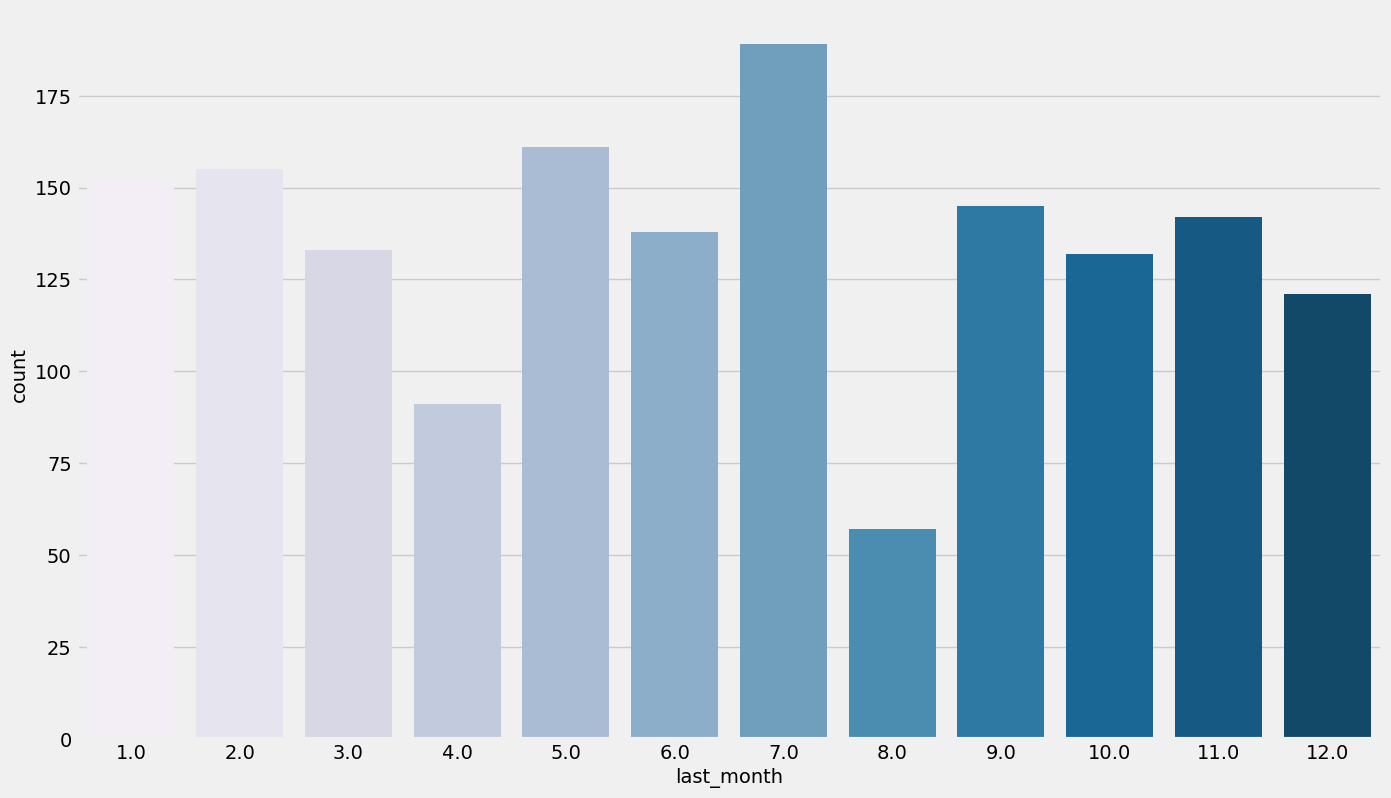

In [50]:
df['last_month']=df['LastWorkingDate'].dt.month
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df,x='last_month', palette = "PuBu")

<Axes: xlabel='first_month', ylabel='count'>

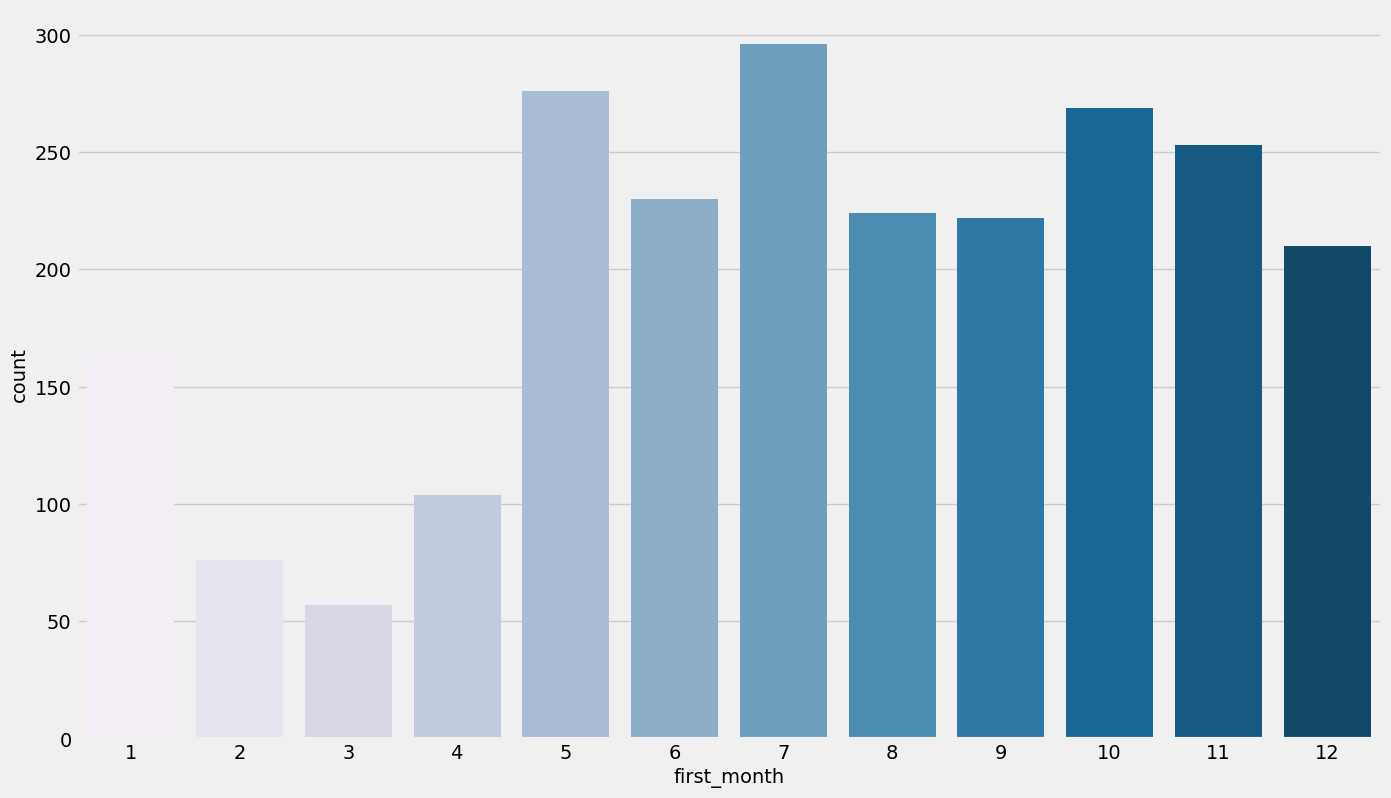

In [51]:
df['first_month']=df['Dateofjoining'].dt.month
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df,x='first_month', palette = 'PuBu')

### Insights
- Most of the drivvers of OLA are among the age range of 25-40. 

- Drivers usually stay around for a period of 1 year with the organization but service period of churned women drivers is lower than men

- Grade: Drivers with lower grades (Grade 1 &2 ) are contributors to 66% of total business

- Rating: Drivers with higher quarterly ratings are among the top contributors to the revenue

- Months of April and August have highest churn

- Lower Grade drivers churn more often

- Churn is related to cities, some cities have higher churn and lower Service Periods among others

- Earning of drivers are based on their Grade but we also see that only 17% get promoted which hinders their opportunity to earn more







# Data Pre-processing

In [52]:
pd.set_option('display.max_columns', None)
df.head(20)

index  Driver_ID  Unnamed: 0    MMM-YY   Age  Gender City  \
0       0          1           2  03/01/19  28.0    male  C23   
1       1          2           4  12/01/20  31.0    male   C7   
2       2          4           9  04/01/20  43.0    male  C13   
3       3          5          12  03/01/19  29.0    male   C9   
4       4          6          17  12/01/20  31.0  female  C11   
5       5          8          20  11/01/20  34.0    male   C2   
6       6         11          21  12/01/20  28.0  female  C19   
7       7         12          27  12/01/19  35.0    male  C23   
8       8         13          50  11/01/20  31.0    male  C19   
9       9         14          53  12/01/20  39.0  female  C26   
10     10         16          55  02/01/19  30.0  female  C23   
11     11         17          62  07/01/19  43.0    male  C20   
12     12         18          67  05/01/19  27.0  female  C17   
13     13         20          73  03/01/20  26.0  female  C19   
14     14         21          87  02/01/20  34.0  female  C29   
15     15         22         103  04/01/20  41.0    male  C10   
16     16         24         113  10/01/19  31.0    male  C24   
17     17         25         137  12/01/20  31.0    male  C24   
18     18         26         161  12/01/20  43.0    male  C14   
19     19         29         166  05/01/19  30.0    male  C13   

    Education_Level  Income Dateofjoining LastWorkingDate  \
0                 2   57387    2018-12-24      2019-03-11   
1                 2   67016    2020-11-06             NaT   
2                 2   65603    2019-12-07      2020-04-27   
3                 0   46368    2019-01-09      2019-03-07   
4                 1   78728    2020-07-31             NaT   
5                 0   70656    2020-09-19      2020-11-15   
6                 2   42172    2020-12-07             NaT   
7                 2   28116    2019-06-29      2019-12-21   
8                 2  119227    2015-05-28      2020-11-25   
9                 0   19734    2020-10-16             NaT   
10                0   52963    2018-11-30      2019-02-22   
11                2   51099    2018-03-06      2019-07-20   
12                1   31631    2019-01-09      2019-04-30   
13                0   40342    2019-10-25      2020-03-01   
14                1   22755    2018-05-12      2020-02-17   
15                2   31224    2018-05-25      2020-04-26   
16                2   76308    2018-05-25      2019-10-27   
17                1  102077    2017-10-30             NaT   
18                2  132577    2018-05-07             NaT   
19                2   30312    2018-05-20      2019-05-23   

    Joining Designation  Grade  Total Business Value  Quarterly Rating  \
0                     1      1                     0                 2   
1                     2      2                     0                 1   
2                     2      2                     0                 1   
3                     1      1                     0                 1   
4                     3      3                     0                 2   
5                     3      3                     0                 1   
6                     1      1                     0                 1   
7                     1      1                     0                 1   
8                     1      4                     0                 1   
9                     3      3                     0                 1   
10                    2      2                     0                 1   
11                    1      1                     0                 1   
12                    1      1                     0                 1   
13                    3      3                     0                 1   
14                    1      1                281380                 1   
15                    1      1                     0                 1   
16                    1      2                343160                 2   
17                    1 

In [53]:
df.isnull().sum()

index                     0
Driver_ID                 0
Unnamed: 0                0
MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
totalbusiness             0
churn                     0
service_period          765
promoted                  0
last_month              765
first_month               0
dtype: int64

In [54]:
# Function to fill NaT values in 'LastWorkingDay' column with their currnet reporting date of 'MM-YYY' column
def fill_last_working_day(row):
    if pd.isnull(row['LastWorkingDate']):
        return row['MMM-YY']
    else:
        return row['LastWorkingDate']

# Apply the function to each row
df['LastWorkingDate'] = df.apply(fill_last_working_day, axis=1)

In [55]:
#coverting the object columns to datetime
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

In [56]:
#calculcating service period of all employees
#filling the last working day of working employees with their reporting date coulmn
df['service_period']=df['LastWorkingDate']- df['Dateofjoining']
df['service_period']=df['service_period'].dt.days
df.isnull().sum()

index                     0
Driver_ID                 0
Unnamed: 0                0
MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate           0
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
totalbusiness             0
churn                     0
service_period            0
promoted                  0
last_month              765
first_month               0
dtype: int64

In [57]:
df['last_month']=df['LastWorkingDate'].dt.month
df.isnull().sum()

index                   0
Driver_ID               0
Unnamed: 0              0
MMM-YY                  0
Age                     0
Gender                  0
City                    0
Education_Level         0
Income                  0
Dateofjoining           0
LastWorkingDate         0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
totalbusiness           0
churn                   0
service_period          0
promoted                0
last_month              0
first_month             0
dtype: int64

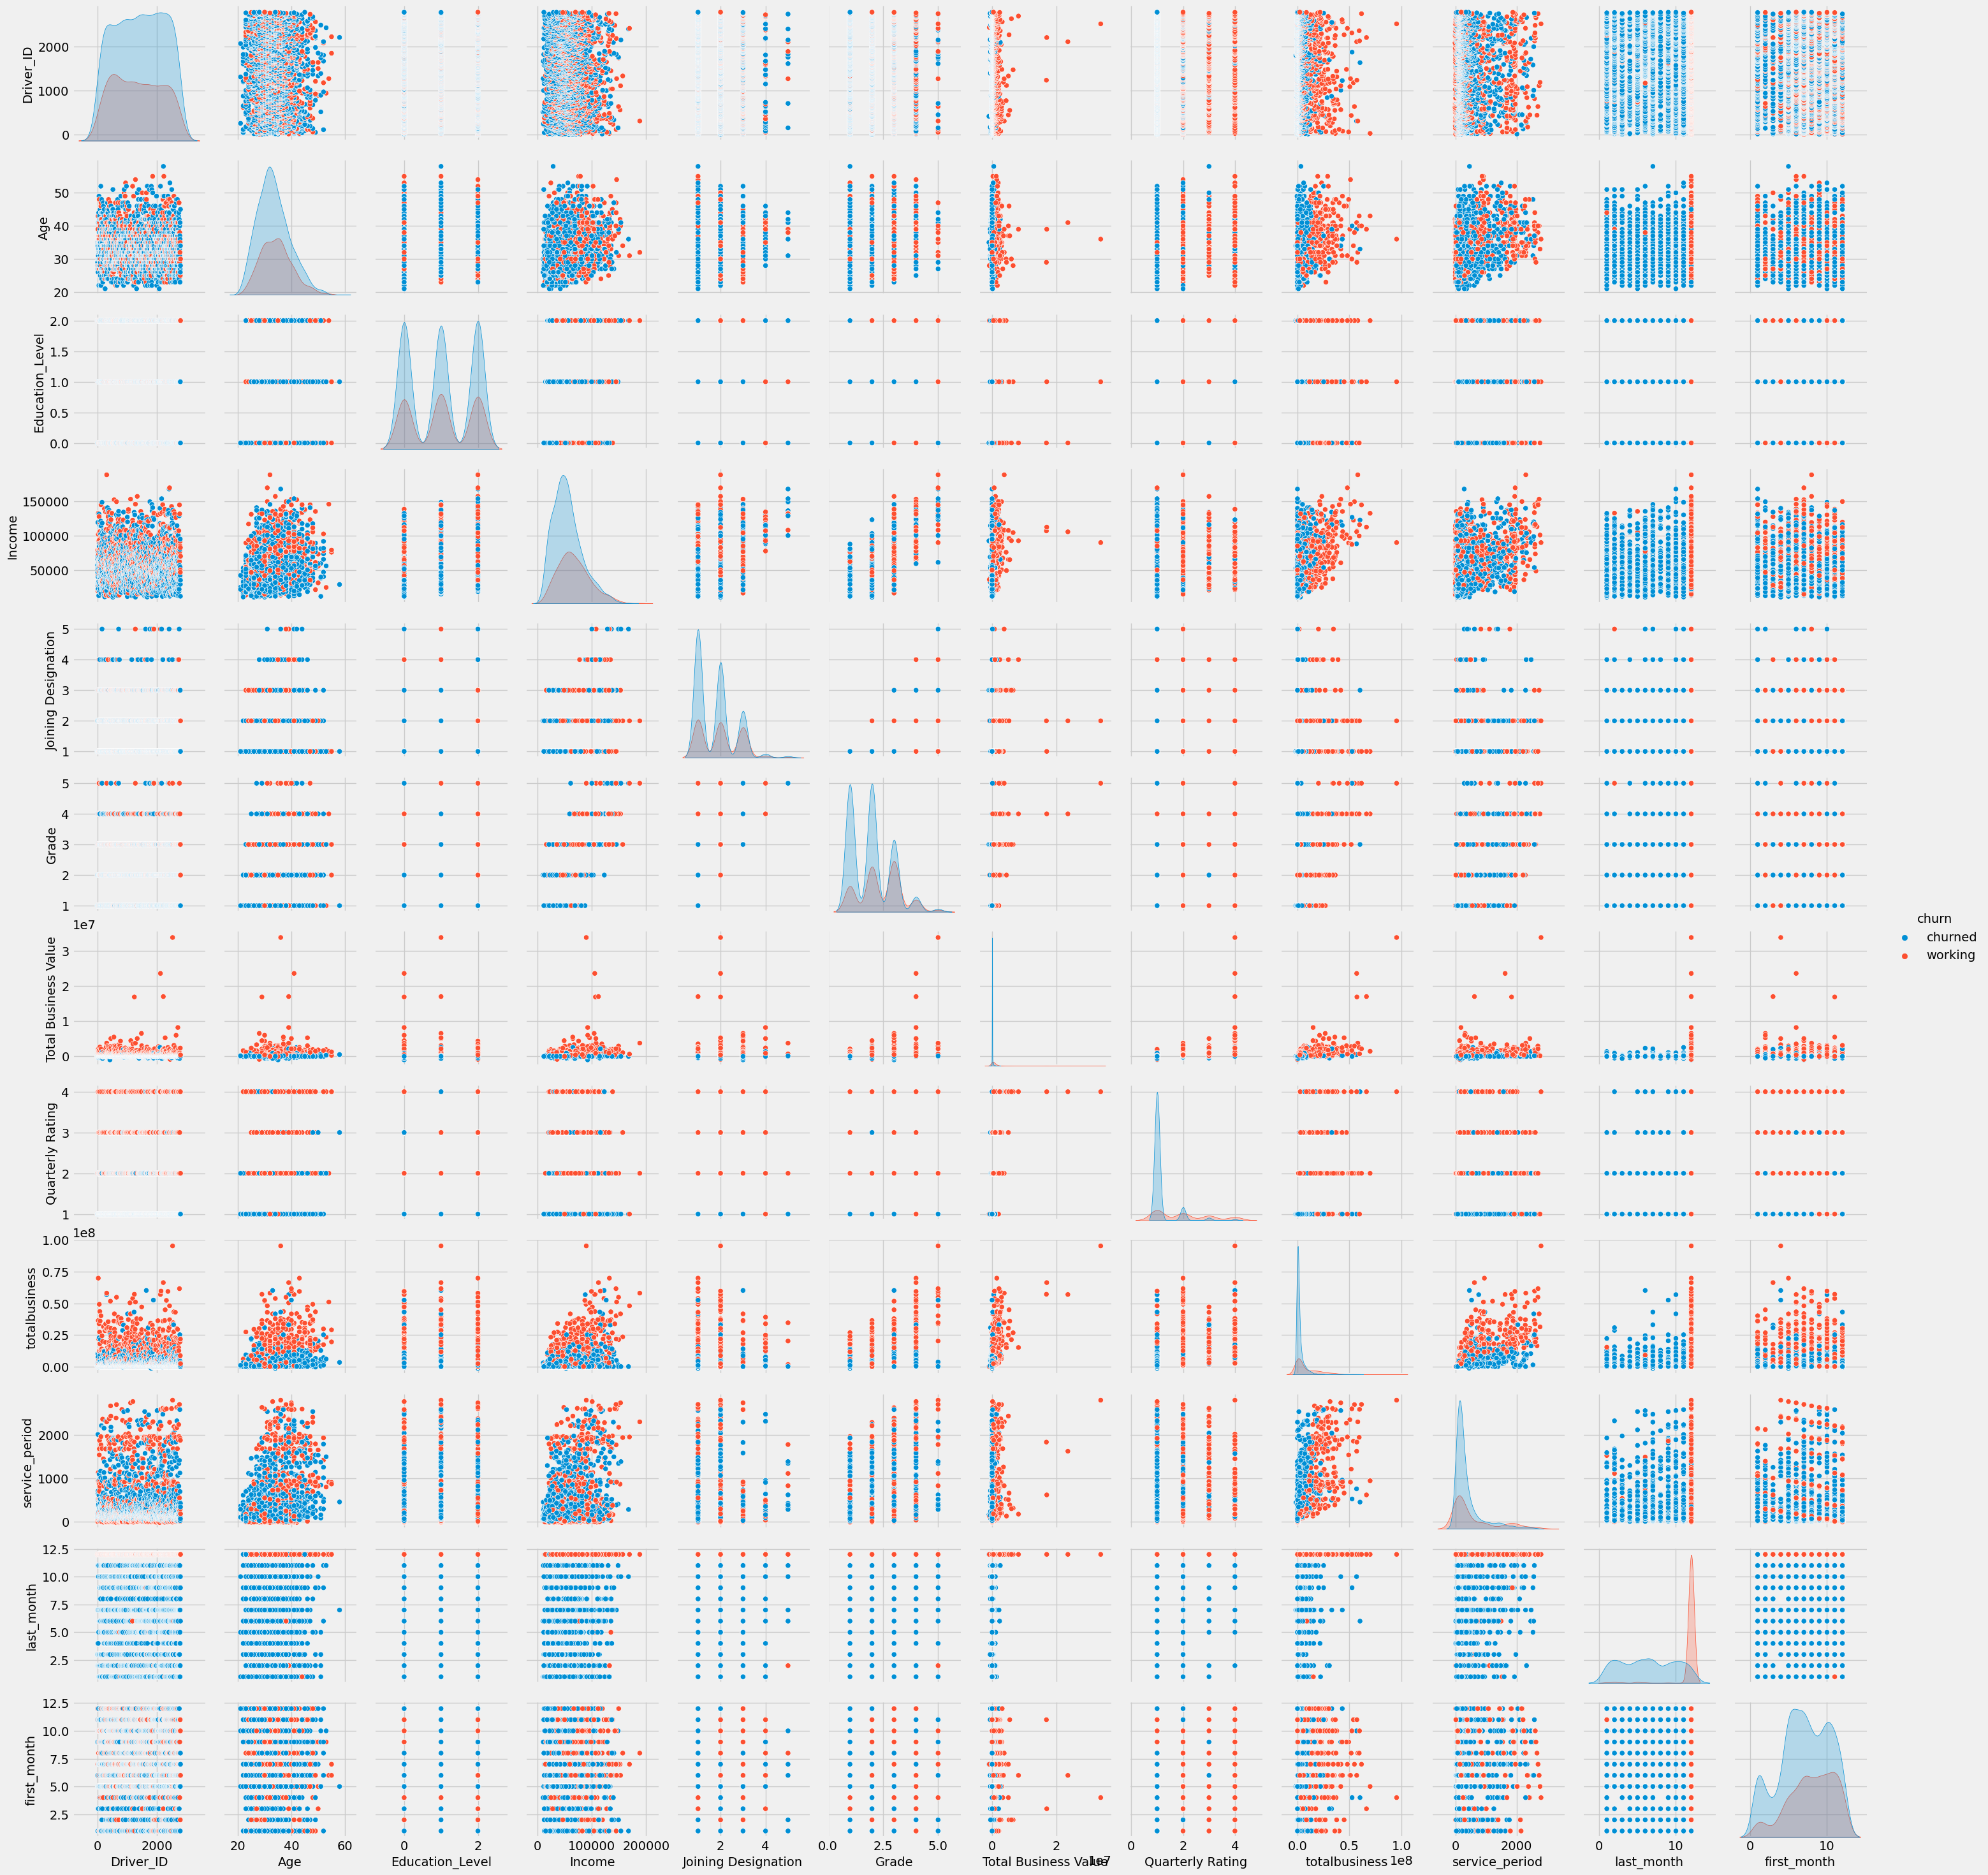

In [115]:
sns.pairplot(df,hue='churn')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12256\1816386778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='Blues',annot=True)


<Axes: >

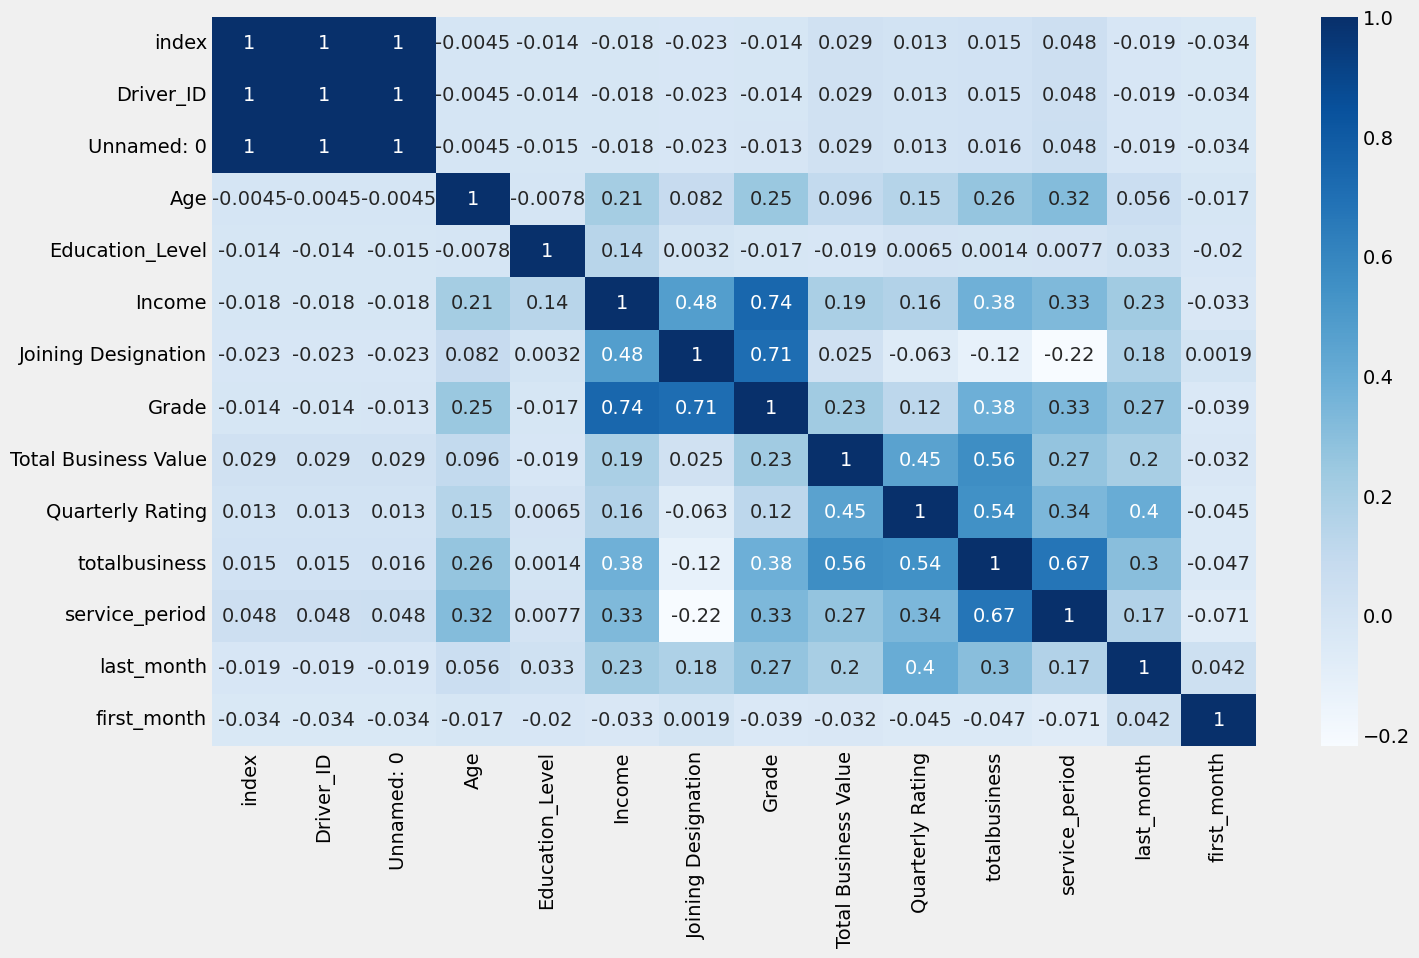

In [58]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [59]:
#dropping index and Unnamed: 0 columns
df.drop(columns=['index','Unnamed: 0'],inplace =True)

In [60]:
df.dtypes

Driver_ID                        int64
MMM-YY                          object
Age                            float64
Gender                          object
City                            object
Education_Level                  int64
Income                           int64
Dateofjoining           datetime64[ns]
LastWorkingDate         datetime64[ns]
Joining Designation              int64
Grade                            int64
Total Business Value             int64
Quarterly Rating                 int64
totalbusiness                    int64
churn                           object
service_period                   int64
promoted                        object
last_month                       int64
first_month                      int64
dtype: object

In [61]:
#dropping datetime columns
df.drop(columns=['MMM-YY','Dateofjoining','LastWorkingDate'],inplace=True)

In [62]:
df.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'totalbusiness', 'churn', 'service_period',
       'promoted', 'last_month', 'first_month'],
      dtype='object')

### Preparing X and y variables

In [63]:
# Define X and y
X = df.drop(columns=['churn'])
y = df['churn'].map({'churned': 1, 'working': 0})

In [64]:
X.dtypes

Driver_ID                 int64
Age                     float64
Gender                   object
City                     object
Education_Level           int64
Income                    int64
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
totalbusiness             int64
service_period            int64
promoted                 object
last_month                int64
first_month               int64
dtype: object

In [69]:


#Creating column transformer with 3 types of Transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

num_features=X.select_dtypes(exclude='object').columns

cat_features=X.select_dtypes(include='object').columns


numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor = ColumnTransformer(
   transformers= [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)



In [72]:
X = preprocessor.fit_transform(X)

In [73]:
# Append SMOTE to preprocessing pipeline
smote = SMOTE(random_state=42)

# Apply preprocessing and SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

In [74]:
X.shape

(2381, 45)

In [77]:
print("Original class distribution:")
print(y.value_counts())
print("\nResampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
1    1616
0     765
Name: churn, dtype: int64

Resampled class distribution:
1    1616
0    1616
Name: churn, dtype: int64


### Splitting the dataset in train and test set

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

### Creating Models

In [79]:
#importin multiple models at one
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [80]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [93]:
models = {
    'rf' : RandomForestClassifier(),
    'gb' : GradientBoostingClassifier(),
    'xgb': XGBClassifier(),
    'dt' : DecisionTreeClassifier()
}

model_list=[]
Accuracy=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')#what else can be put here
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    #Test set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')#what else can be put here
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print(" - Accuracy: {:.4f}".format(model_train_accuracy))
    print(' - F1 score: {:.4f}'.format(model_train_f1))
    
    print(' - Precision: {:.4f}'.format(model_train_precision))
    print(' - Recall: {:.4f}'.format(model_train_precision))
    print(' - Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print ('-------------------------------------------------')
    
    print('Model performance for Test set')
    print(" - Accuracy: {:.4f}".format(model_test_accuracy))
    print(' - F1 score: {:.4f}'.format(model_test_f1))
    
    print(' - Precision: {:.4f}'.format(model_test_precision))
    print(' - Recall: {:.4f}'.format(model_test_precision))
    print(' - Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

rf
Model performance for Training set
 - Accuracy: 1.0000
 - F1 score: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - Roc Auc Score: 1.0000
-------------------------------------------------
Model performance for Test set
 - Accuracy: 0.9602
 - F1 score: 0.9601
 - Precision: 0.9667
 - Recall: 0.9667
 - Roc Auc Score: 0.9511


gb
Model performance for Training set
 - Accuracy: 0.9774
 - F1 score: 0.9775
 - Precision: 0.9867
 - Recall: 0.9867
 - Roc Auc Score: 0.9761
-------------------------------------------------
Model performance for Test set
 - Accuracy: 0.9581
 - F1 score: 0.9578
 - Precision: 0.9610
 - Recall: 0.9610
 - Roc Auc Score: 0.9460


xgb
Model performance for Training set
 - Accuracy: 1.0000
 - F1 score: 1.0000
 - Precision: 1.0000
 - Recall: 1.0000
 - Roc Auc Score: 1.0000
-------------------------------------------------
Model performance for Test set
 - Accuracy: 0.9539
 - F1 score: 0.9536
 - Precision: 0.9580
 - Recall: 0.9580
 - Roc Auc Score: 0.9411


dt
Model per

In [94]:
pd.DataFrame(list(zip(model_list, Accuracy)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

Empty DataFrame
Columns: [Model Name, Accuracy]
Index: []

In [99]:
#hyper paramter tuning
params= {
    'n_estimators': [5,10,20,50,70,100,200,250],
    'max_depth': [3,5,10.15],
    'max_features' : [8,9,10,12,15]
}

In [100]:
#Model lsit for Hyper-parameter tuning

randomcv_models = [
    ('gb',GradientBoostingClassifier(),params)
]

In [101]:
randomcv_models

[('gb',
  GradientBoostingClassifier(),
  {'n_estimators': [5, 10, 20, 50, 70, 100, 200, 250],
   'max_depth': [3, 5, 10.15],
   'max_features': [8, 9, 10, 12, 15]})]

In [102]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,
                           param_distributions = params,
                           n_iter = 100,
                           scoring = 'accuracy',
                           cv=3)
    
    random.fit(X_train,y_train)
    model_param[name]= random.best_params_
    
for model_name in model_param:
    print(f"-------------------- Best Params for {model_name}-----------")
    print(model_param[model_name])

-------------------- Best Params for gb-----------
{'n_estimators': 20, 'max_features': 8, 'max_depth': 5}


C:\Users\User\anaconda31\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
102 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
102 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda31\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda31\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\User\anaconda31\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda31\lib\site-packages

In [103]:
random.fit(X_train,y_train)

print("Best Params:", random.best_params_)
print("Best score:", random.best_score_)

C:\Users\User\anaconda31\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
99 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
99 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda31\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda31\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\User\anaconda31\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda31\lib\site-packages\s

Best Params: {'n_estimators': 70, 'max_features': 15, 'max_depth': 3}
Best score: 0.9522061319622113


In [105]:
y_pred = random.predict(X_test)

In [106]:
accuracy_score(y_pred,y_test)

0.9622641509433962

In [110]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [111]:
thresholds

array([2, 1, 0], dtype=int64)

In [112]:
import plotly.graph_objects as go
import numpy as np


# Generate a trace for ROC curve
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name='ROC curve'
)

# Only label every nth point to avoid cluttering
n = 10  
indices = np.arange(len(thresholds)) % n == 0  # Choose indices where index mod n is 0

trace1 = go.Scatter(
    x=fpr[indices], 
    y=tpr[indices], 
    mode='markers+text', 
    name='Threshold points', 
    text=[f"Thr={thr:.2f}" for thr in thresholds[indices]], 
    textposition='top center'
)


# Diagonal line
trace2 = go.Scatter(
    x=[0, 1], 
    y=[0, 1], 
    mode='lines', 
    name='Random (Area = 0.5)', 
    line=dict(dash='dash')
)

data = [trace0, trace1, trace2]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()

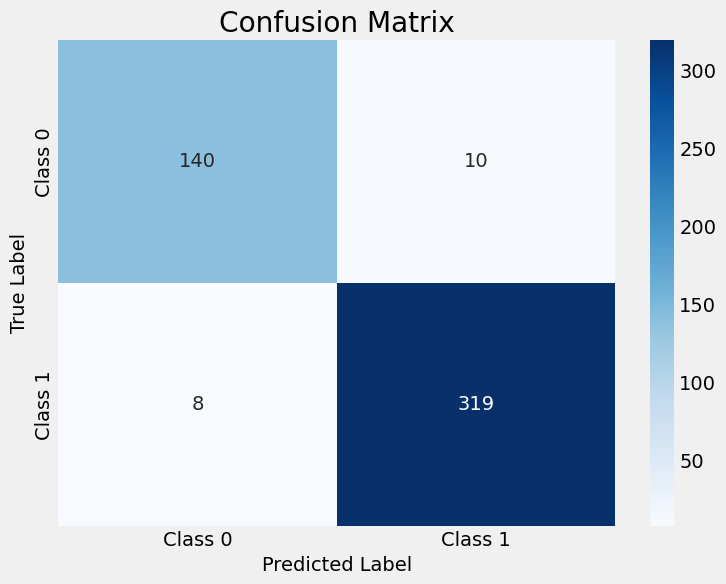

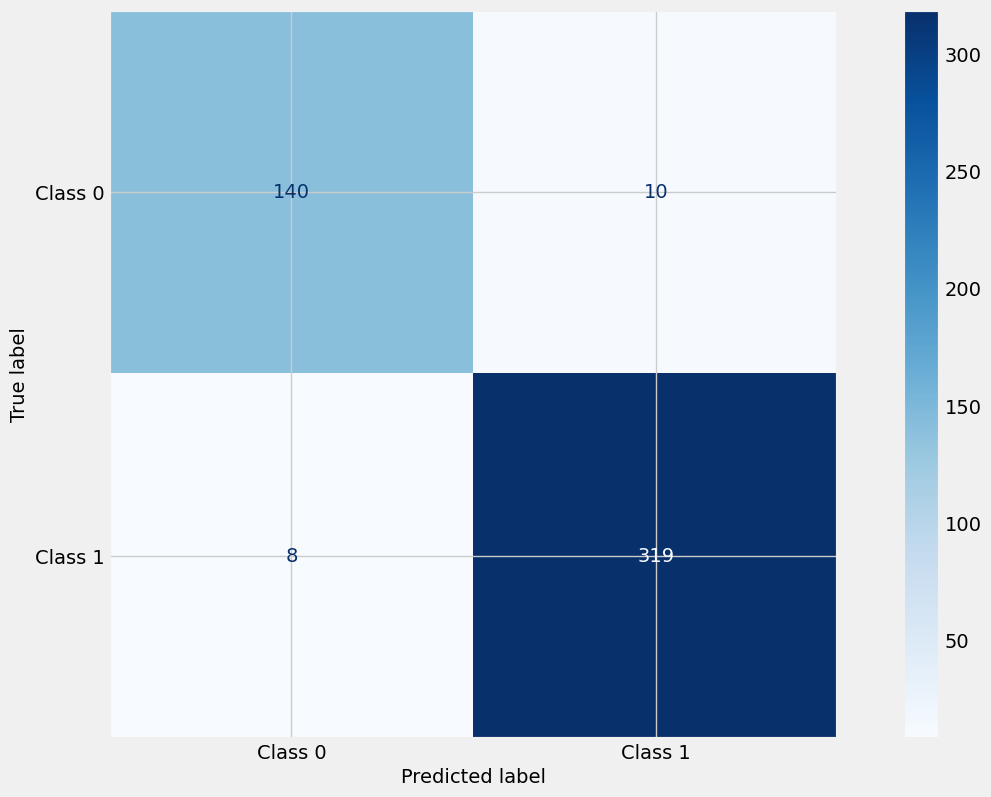

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot using scikit-learn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.show()